# Machine Learning Classification method for emotion identification

In this notebook we are trying to use the ML techniques in order to identify automaticaly the emotion from the Action Units of face images. The initial dataset is taken from the [CK+ dataset](http://www.consortium.ri.cmu.edu/ckagree/) and then processed through the [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace) toolkit. The results of OpenFace toolkit was saved in a CSV file and then used for our purpose. 

The data used to train the model are:
- `output` - the human labeled emotions
- `input` - the Action Units of two types: dicotomical `AU**_c` (0 or 1) and continuous `AU**_r`


**The main steps of this script are:**
- definition of codes for emotions and Action Units
- downloading and dataset cleaning
- analysis of AUs
- ML training and result analysis
- Conclusions

Note that every script cell is commented at the begining and other observations are inserted whenever is needed.


# Definition of codes for emotions and Action Units

In [4]:
# THE CODES FOR EMOTION AND ACTION UNITS USED IN THIS SCRIPT
emo_map = { 0:'neutral',
           1:'anger',
           2:'contempt',
           3:'disgust',
           4:'fear',
           5:'happy',
           6:'sadness',
           7:'surprise'
          }
AU_map = {0:'Neutral face',
            1:'Inner Brow Raiser',
            2:'Outer Brow Raiser',
            4:'Brow Lowerer',
            5:'Upper Lid Raiser',
            6:'Cheek Raiser',
            7:'Lid Tightener',
            8:'Lips Toward Each Other',
            9:'Nose Wrinkler',
            10:'Upper Lip Raiser',
            11:'Nasolabial Deepener',
            12:'Lip Corner Puller',
            13:'Sharp Lip Puller',
            14:'Dimpler',
            15:'Lip Corner Depressor',
            16:'Lower Lip Depressor',
            17:'Chin Raiser',
            18:'Lip Pucker',
            19:'Tongue Show',
            20:'Lip Stretcher',
            21:'Neck Tightener',
            22:'Lip Funneler',
            23:'Lip Tightener',
            24:'Lip Pressor',
            25:'Lips Part',
            26:'Jaw Drop',
            27:'Mouth Stretch',
            28:'Lip Suck',
         }

In [5]:
# IMPORT OF ALL THE REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy.stats as stats

import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

# setting font size
sns.set(font_scale=1.4)
# setting a default color palette for the charts
sns.set_palette('Paired', n_colors=10)
# set grid in all charts
plt.grid(True)

# Adding the following line, allows Jupyter Notebook to visualize plots
# produced by matplotlib directly below the code cell which generated those.
%matplotlib inline

import os

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [6]:
# THE DIRECTORY OF THE INITIAL DATASET WITH IMAGES
img_dir='C:\\Users\\datascience\\Desktop\\Cognitive behavioral\\PROJECT - BLINK LIE DETECTION\\DATA\\extended-cohn-kanade-images\\cohn-kanade-images'

# Downloading and dataset cleaning

In [7]:
# DOWNLOAD THE DATA FROM CSV FILE
DATASET = 'labeled_light.csv'
df = pd.read_csv(DATASET)
print("Shape of the dataset: {}".format(df.shape))
print('There are {} observations'.format(df.shape[0]))
print('There are {} variables'.format(df.shape[1]))

Shape of the dataset: (400, 73)
There are 400 observations
There are 73 variables


In [8]:
# ANALYSIS FOR MISSING VALUES
print("There are missing values in the dataset: {}".format(df.isnull().any().any()))

There are missing values in the dataset: False


In [9]:
# ANALYSIS OF THE COLUMNS IN THE DATASET
print('The column names are:')
print(list(df.columns))

The column names are:
['Unnamed: 0', 'img_name', 'AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 'AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c', 'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c', 'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c', 'true_AU01', 'true_AU02', 'true_AU04', 'true_AU05', 'true_AU06', 'true_AU07', 'true_AU09', 'true_AU10', 'true_AU11', 'true_AU12', 'true_AU13', 'true_AU14', 'true_AU15', 'true_AU16', 'true_AU17', 'true_AU18', 'true_AU20', 'true_AU21', 'true_AU23', 'true_AU24', 'true_AU25', 'true_AU26', 'true_AU27', 'true_AU28', 'true_AU30', 'true_AU31', 'true_AU34', 'true_AU38', 'true_AU39', 'true_AU43', 'true_AU45', 'true_AU54', 'true_AU62', 'true_AU63', 'true_AU64', 'emotion']


In [10]:
# QUICK VIEW OF THE DATASET
print('Head of the Dataset:')
print(df.head(2))

Head of the Dataset:
   Unnamed: 0           img_name  AU01_r  AU02_r  AU04_r  AU05_r  AU06_r  \
0           0  S091_001_00000001       0       0   0.000       0     0.0   
1           1  S503_001_00000001       0       0   1.101       0     0.0   

   AU07_r  AU09_r  AU10_r   ...     true_AU34  true_AU38  true_AU39  \
0     0.0       0     0.0   ...             0        0.0          0   
1     0.0       0     0.0   ...             0        0.0          0   

   true_AU43  true_AU45  true_AU54  true_AU62  true_AU63  true_AU64  emotion  
0        0.0        0.0        0.0        0.0        0.0        0.0        0  
1        0.0        0.0        0.0        0.0        0.0        0.0        0  

[2 rows x 73 columns]


In [11]:
# CHANGE THE INDEX OF THE DATASET WITH THE IMAGE NAME
df.index = df.img_name
print(df.head(2))

                   Unnamed: 0           img_name  AU01_r  AU02_r  AU04_r  \
img_name                                                                   
S091_001_00000001           0  S091_001_00000001       0       0   0.000   
S503_001_00000001           1  S503_001_00000001       0       0   1.101   

                   AU05_r  AU06_r  AU07_r  AU09_r  AU10_r   ...     true_AU34  \
img_name                                                    ...                 
S091_001_00000001       0     0.0     0.0       0     0.0   ...             0   
S503_001_00000001       0     0.0     0.0       0     0.0   ...             0   

                   true_AU38  true_AU39  true_AU43  true_AU45  true_AU54  \
img_name                                                                   
S091_001_00000001        0.0          0        0.0        0.0        0.0   
S503_001_00000001        0.0          0        0.0        0.0        0.0   

                   true_AU62  true_AU63  true_AU64  emotion  
img

In [12]:
# STATISTICS FOR ALL ACTION UNITS
selected_cols = [col for col in df.columns.values if col[:2] == 'AU']
selected_cols.append('emotion')
data = df[selected_cols]
au_index=data.describe().transpose()
print(au_index)

         count      mean       std  min       25%      50%      75%    max
AU01_r   400.0  0.000000  0.000000  0.0  0.000000  0.00000  0.00000  0.000
AU02_r   400.0  0.000000  0.000000  0.0  0.000000  0.00000  0.00000  0.000
AU04_r   400.0  0.594309  0.883016  0.0  0.000000  0.02433  0.94925  3.582
AU05_r   400.0  0.000000  0.000000  0.0  0.000000  0.00000  0.00000  0.000
AU06_r   400.0  0.600965  0.859850  0.0  0.000000  0.00000  1.18500  3.365
AU07_r   400.0  1.253619  1.261147  0.0  0.000448  0.88985  2.15275  5.000
AU09_r   400.0  0.000000  0.000000  0.0  0.000000  0.00000  0.00000  0.000
AU10_r   400.0  0.410045  0.657233  0.0  0.000000  0.00000  0.74205  2.489
AU12_r   400.0  0.652819  1.124445  0.0  0.000000  0.00000  0.66370  4.028
AU14_r   400.0  0.362822  0.592913  0.0  0.000000  0.00000  0.57460  3.185
AU15_r   400.0  0.000000  0.000000  0.0  0.000000  0.00000  0.00000  0.000
AU17_r   400.0  0.000000  0.000000  0.0  0.000000  0.00000  0.00000  0.000
AU20_r   400.0  0.000000 

**We can note that there are Action Units all zero. These AU will not be used further**

In [15]:
#IDENTIFICATION OF THE AU THAT COULD BE USED AS INPUT
print(au_index[au_index[max]!=0])
print('\nNbr of good AU: ',au_index[au_index[max]!=0].shape[0]-1)

         count      mean       std  min       25%      50%      75%    max
AU04_r   400.0  0.594309  0.883016  0.0  0.000000  0.02433  0.94925  3.582
AU06_r   400.0  0.600965  0.859850  0.0  0.000000  0.00000  1.18500  3.365
AU07_r   400.0  1.253619  1.261147  0.0  0.000448  0.88985  2.15275  5.000
AU10_r   400.0  0.410045  0.657233  0.0  0.000000  0.00000  0.74205  2.489
AU12_r   400.0  0.652819  1.124445  0.0  0.000000  0.00000  0.66370  4.028
AU14_r   400.0  0.362822  0.592913  0.0  0.000000  0.00000  0.57460  3.185
AU04_c   400.0  0.452500  0.498362  0.0  0.000000  0.00000  1.00000  1.000
AU05_c   400.0  0.392500  0.488919  0.0  0.000000  0.00000  1.00000  1.000
AU06_c   400.0  0.422500  0.494576  0.0  0.000000  0.00000  1.00000  1.000
AU07_c   400.0  0.612500  0.487790  0.0  0.000000  1.00000  1.00000  1.000
AU10_c   400.0  0.357500  0.479864  0.0  0.000000  0.00000  1.00000  1.000
AU12_c   400.0  0.307500  0.462036  0.0  0.000000  0.00000  1.00000  1.000
AU14_c   400.0  0.505000 

In [16]:
# KEEP IN THE DATASET ONLY THE GOOD AU AND RELABEL THE EMOTION
data_clean=data.loc[:,list(au_index[au_index[max]!=0].index)]  
data_clean['emotion_label']=[str(x)+'-'+ emo_map.get(x) for x in data_clean.emotion]

good_AU = [col for col in data_clean.columns.values if col[:2] == 'AU']
nbr_AU = len(good_AU)

In [17]:
# QUICK VIEW OF THE CLEAN DATASET
print(data_clean.head(3))
print(data_clean.shape)
print(nbr_AU)
print(good_AU)
print('\n',pd.value_counts(data_clean['emotion_label'], sort=False).sort_index())

                    AU04_r  AU06_r  AU07_r  AU10_r  AU12_r  AU14_r  AU04_c  \
img_name                                                                     
S091_001_00000001  0.00000  0.0000   0.000     0.0     0.0  0.0000       0   
S503_001_00000001  1.10100  0.0000   0.000     0.0     0.0  0.0000       1   
S029_001_00000001  0.02668  0.7817   1.243     0.0     0.0  0.0258       1   

                   AU05_c  AU06_c  AU07_c  AU10_c  AU12_c  AU14_c  AU23_c  \
img_name                                                                    
S091_001_00000001       0       0       0       0       0       0       0   
S503_001_00000001       0       0       0       0       0       1       1   
S029_001_00000001       0       1       1       0       0       1       1   

                   AU28_c  emotion emotion_label  
img_name                                          
S091_001_00000001       1        0     0-neutral  
S503_001_00000001       0        0     0-neutral  
S029_001_00000001  

**Note that the classes are not balanced. We will use bootstrap method to rebalance the dataset in the training stage.**

In [275]:
# THE TABLE OF ACTION UNITS THAT ARE AVAILABLE FOR ML 
print('AU_r is countinous Variable')
print('AU_c is dicotomic Variable')

AU_nbr_good=sorted(list(set([x[2:4] for x in good_AU])))
df1=pd.DataFrame(['AU{}_r'.format(x) in good_AU for x in AU_nbr_good], columns=['AU_r'], index=[x+'-'+AU_map[int(x)] for x in AU_nbr_good])
df1['AU_c']=['AU{}_c'.format(x) in good_AU for x in AU_nbr_good]
df1

AU_r is countinous Variable
AU_c is dicotomic Variable


AU_r  AU_c
04-Brow Lowerer        True  True
05-Upper Lid Raiser   False  True
06-Cheek Raiser        True  True
07-Lid Tightener       True  True
10-Upper Lip Raiser    True  True
12-Lip Corner Puller   True  True
14-Dimpler             True  True
23-Lip Tightener      False  True
28-Lip Suck           False  True

In [23]:
# CREATION OF A FUNCTION IN ORDER TO BETTER ANALYSE EVERY AU

def AU_analysis(i): 

    outliers=[]

    if df1['AU_r'][i] == True and df1['AU_c'][i] == True:

        fig = plt.figure(figsize=(20, 16))
        gs = gridspec.GridSpec(4, 8)
        fig_title = 'The AU '+AU_nbr_good[i]+' - '+AU_map[int(AU_nbr_good[i])]
        fig.suptitle(fig_title, fontsize=20)

        for j in range(8):
            column_r = 'AU{}_r'.format(AU_nbr_good[i])
            column_c = 'AU{}_c'.format(AU_nbr_good[i])
            series_temp= data_clean[data_clean.emotion == j][column_r]
            series_temp_c= data[data.emotion == j][column_c]
         #   print(series_temp[series_temp==max(series_temp)].index[0])
            outliers.append(series_temp[series_temp==max(series_temp)].index[0])

            _ = sns.boxplot(series_temp, 
                    color='#808080', ax=plt.subplot(gs[0, j]))
            _ = sns.swarmplot(series_temp, 
                    color='#df2020', ax=plt.subplot(gs[0, j]))
            plt.subplot(gs[0, j]).set_xlabel(emo_map[j])
            plt.subplot(gs[0, j]).set_xlim(min(series_temp)-0.2,max(series_temp)+0.2)

            _ = sns.distplot(data_clean[data_clean.emotion == j][good_AU[i]],color='#808080', ax=plt.subplot(gs[1, j]), hist_kws=dict(edgecolor="#404040", linewidth=1))
            plt.subplot(gs[1, j]).set_xlabel(emo_map[j])
            plt.subplot(gs[1, j]).set_xlim(min(series_temp)-0.2,max(series_temp)+0.2)

            _ = plt.subplot(gs[2, j]).scatter(series_temp, series_temp_c, color='#df2020')
            plt.subplot(gs[2, j]).set_xlabel(emo_map[j])
            plt.subplot(gs[2, j]).set_xlim(min(series_temp)-0.2,max(series_temp)+0.2)

            _ = plt.subplot(gs[3, j]).hist(series_temp_c, color='#808080',orientation="horizontal")
            plt.subplot(gs[3, j]).set_xlabel(emo_map[j])
            #plt.subplot(gs[3, j]).set_xlim(-0.2,1.2)

        plt.subplot(gs[0, 0]).set_ylabel('Boxplot _r')
        plt.subplot(gs[1, 0]).set_ylabel('Density _r')
        plt.subplot(gs[2, 0]).set_ylabel('Scatter Plot')
        plt.subplot(gs[3, 0]).set_ylabel('Hist _c')

        plt.subplots_adjust(wspace=.3, hspace=.3)

        fig1 = plt.figure(figsize=(20, 10))
        gs1 = gridspec.GridSpec(2, 4)
        fig_title1 = 'The analysis of outliers for '+AU_map[int(AU_nbr_good[i])]
        fig1.suptitle(fig_title1, fontsize=20)
        for j in range(8):
            img_name_max=outliers[j]
            img_path='{}\\{}\\{}\\{}.png'.format(img_dir,img_name_max[:4],img_name_max[5:8],img_name_max)
            img = mpimg.imread(img_path)
            ax=plt.subplot(gs1[j//4, j%4])
            img = ax.imshow(img, cmap='gray')
            ax.axis('off')
            ax.set_title(emo_map[j])


    if df1['AU_r'][i] == False and df1['AU_c'][i] == True:

        fig = plt.figure(figsize=(20, 4))
        gs = gridspec.GridSpec(1, 8)
        fig_title = 'The AU '+AU_nbr_good[i]+' - '+AU_map[int(AU_nbr_good[i])]
        fig.suptitle(fig_title, fontsize=20)
        
        for j in range(8):
            column_c = 'AU{}_c'.format(AU_nbr_good[i])
            series_temp_c= data[data.emotion == j][column_c]

            _ = plt.subplot(gs[0, j]).hist(series_temp_c, color='#808080',orientation="horizontal")
            plt.subplot(gs[0, j]).set_xlabel(emo_map[j])

        plt.subplot(gs[0, 0]).set_ylabel('Hist _c')

        plt.subplots_adjust(wspace=.3, hspace=.3)
    
    

# Analysis of AUs

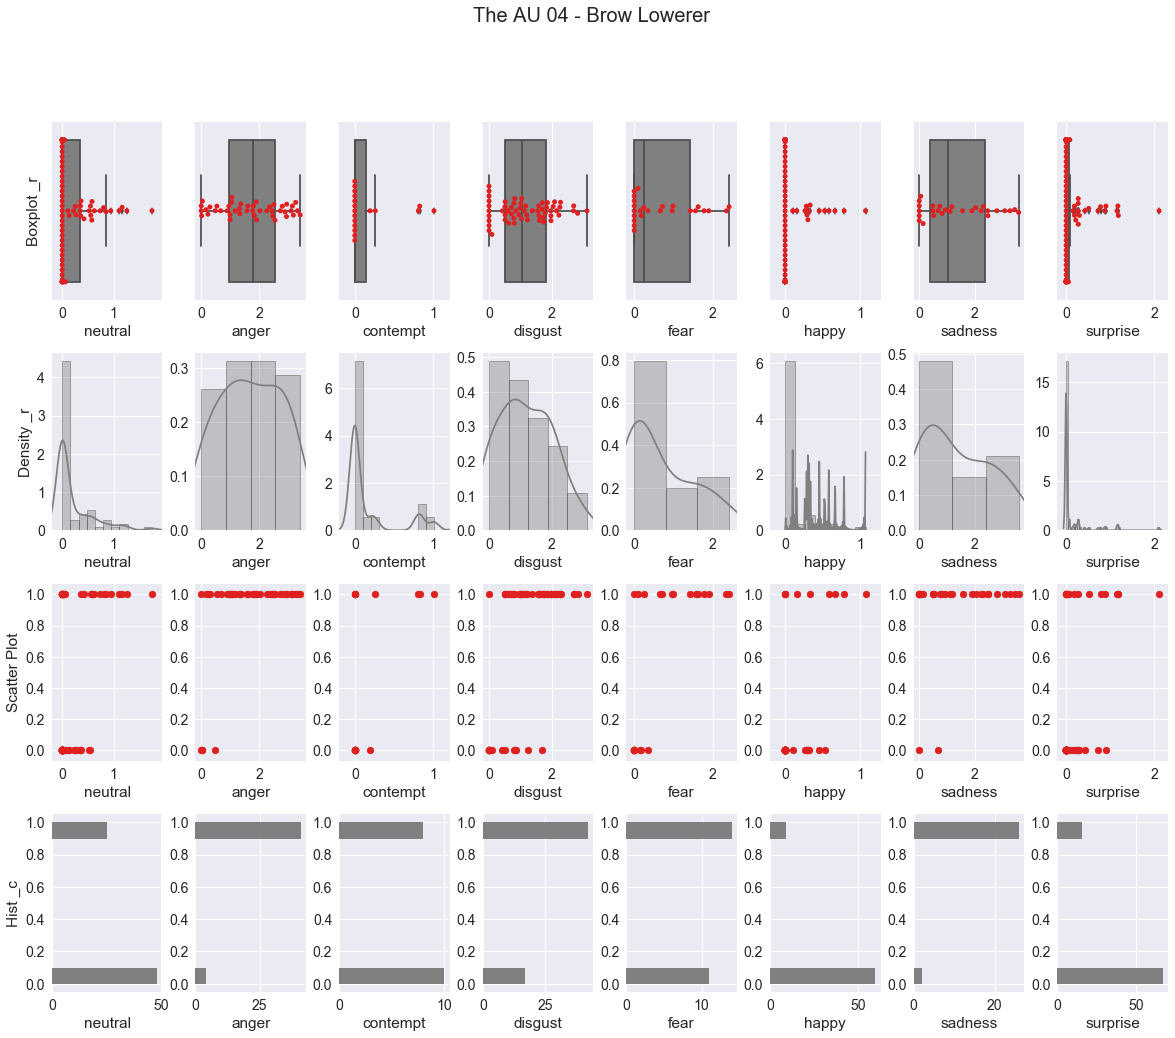

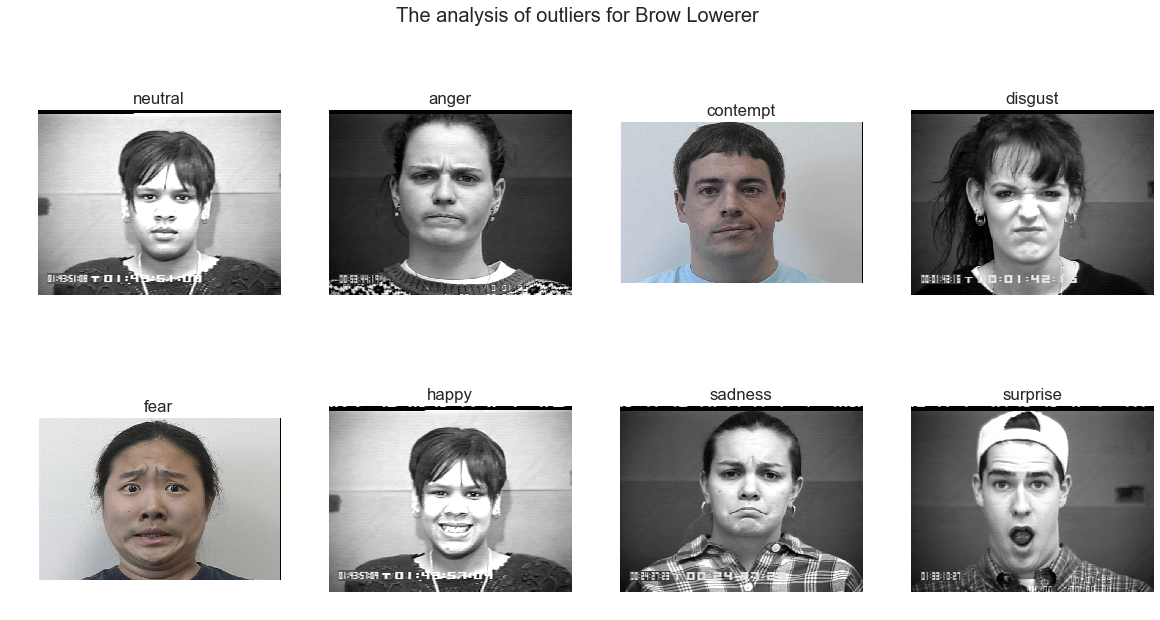

In [24]:
AU_analysis(0)

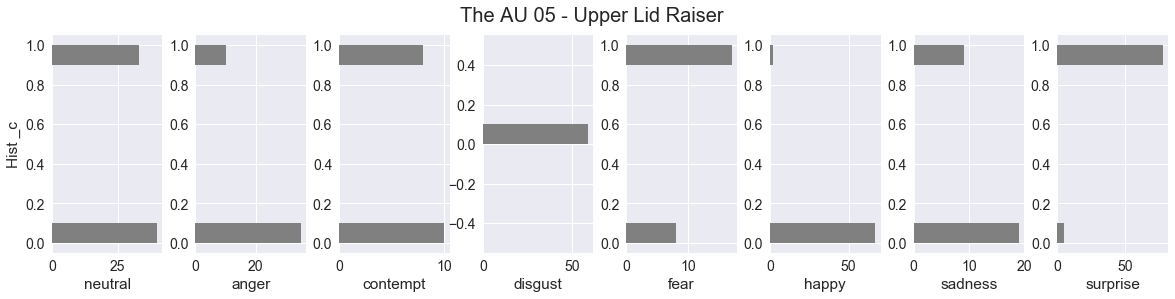

In [25]:
AU_analysis(1)

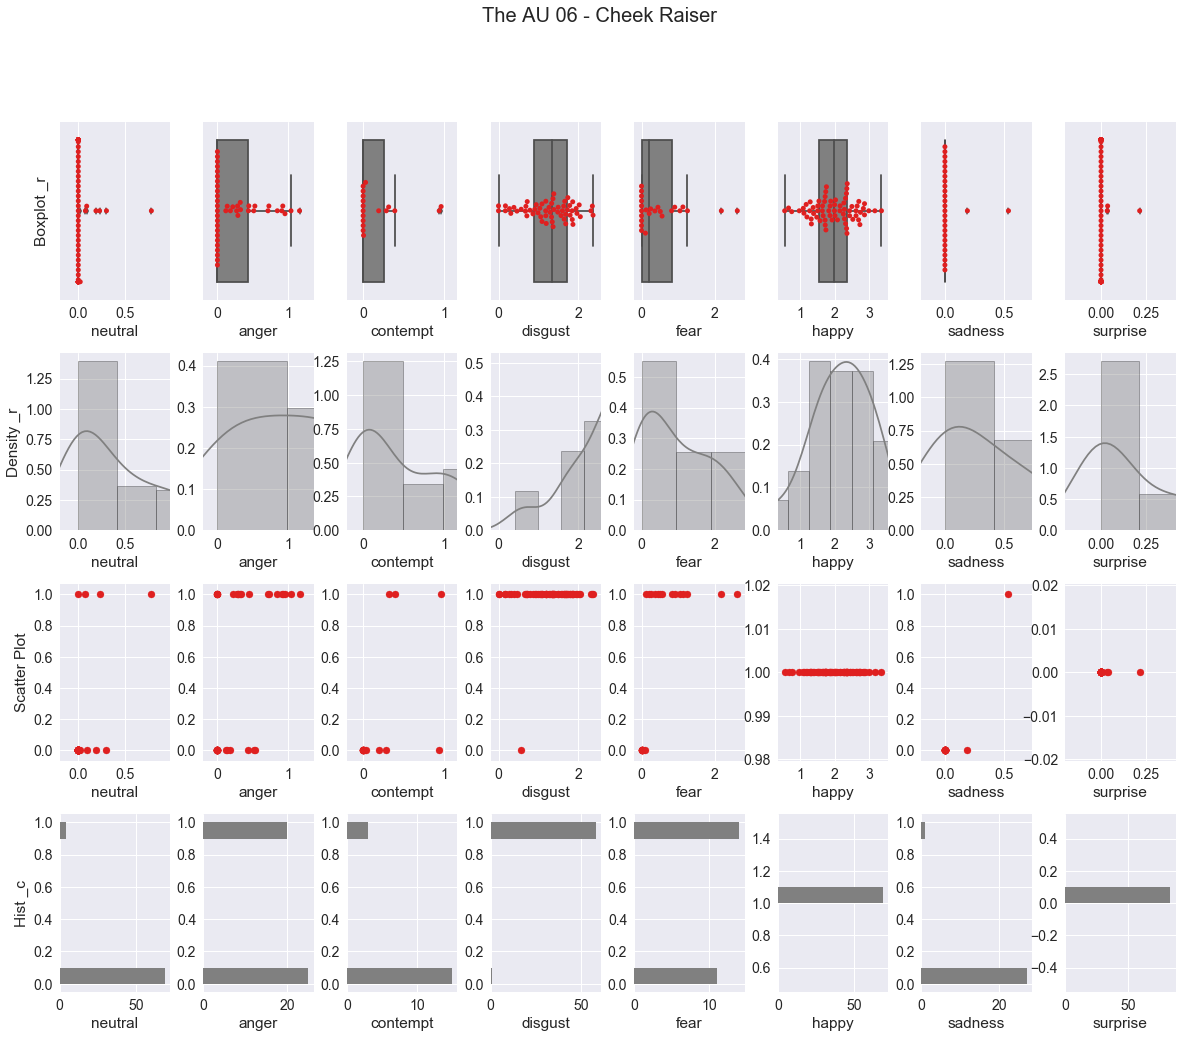

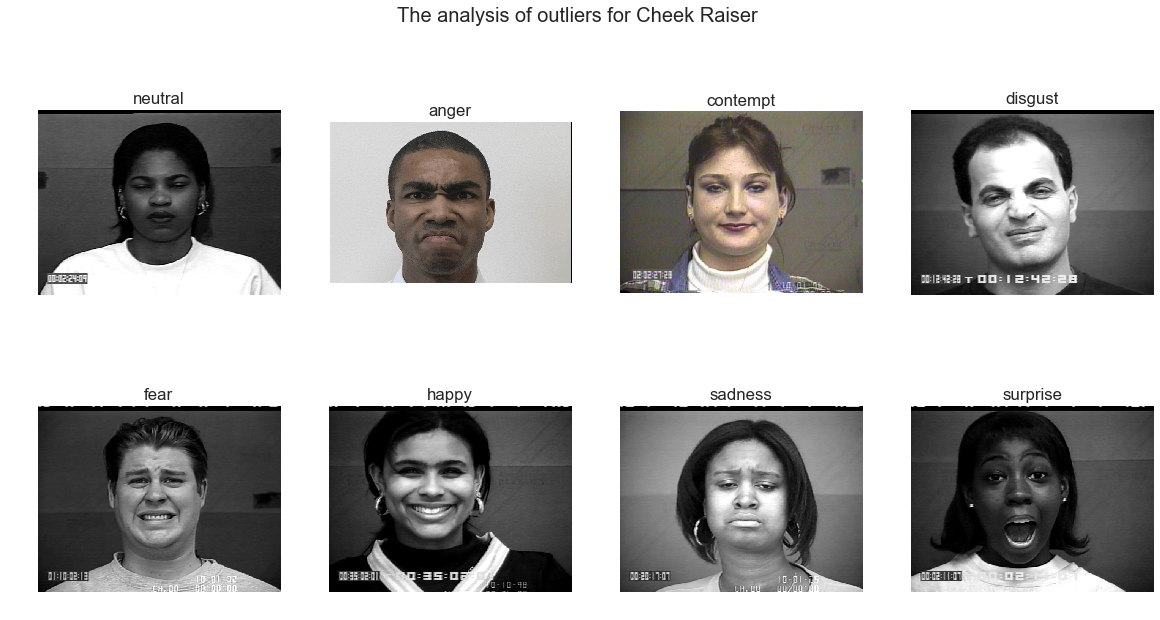

In [26]:
AU_analysis(2)

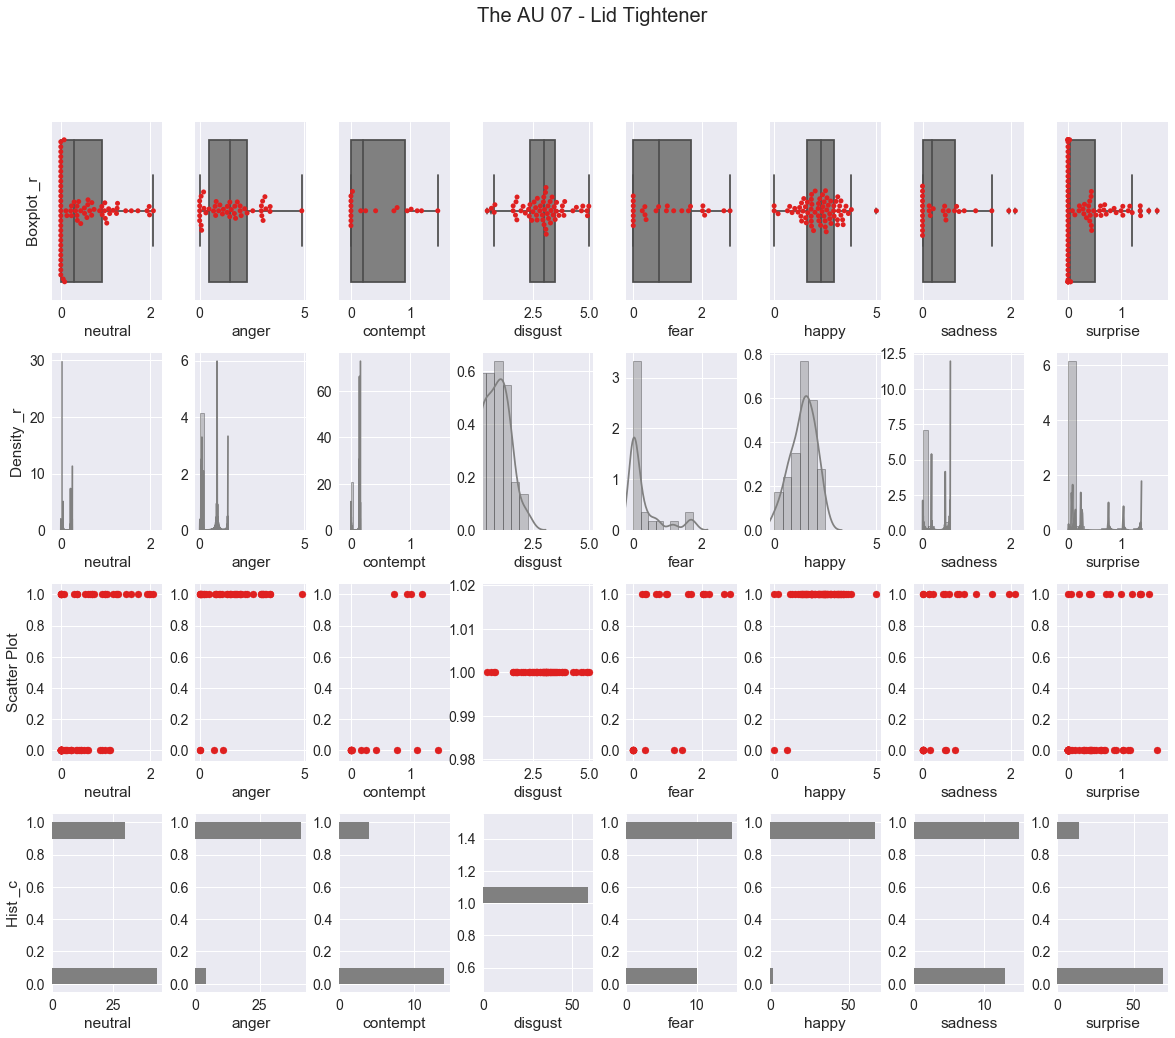

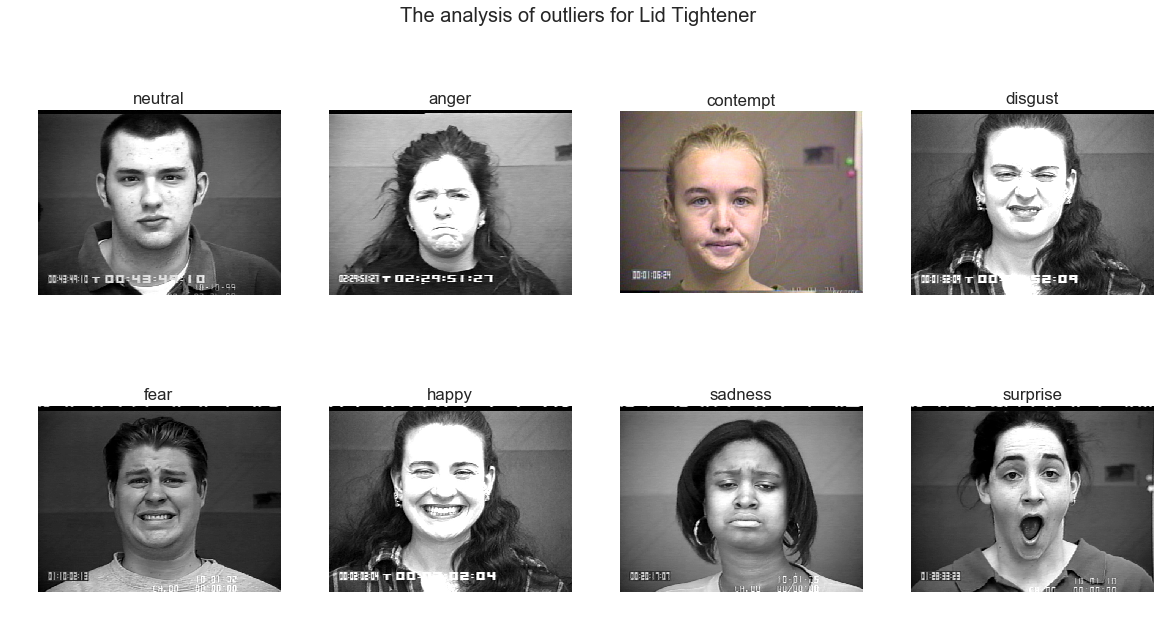

In [27]:
AU_analysis(3)

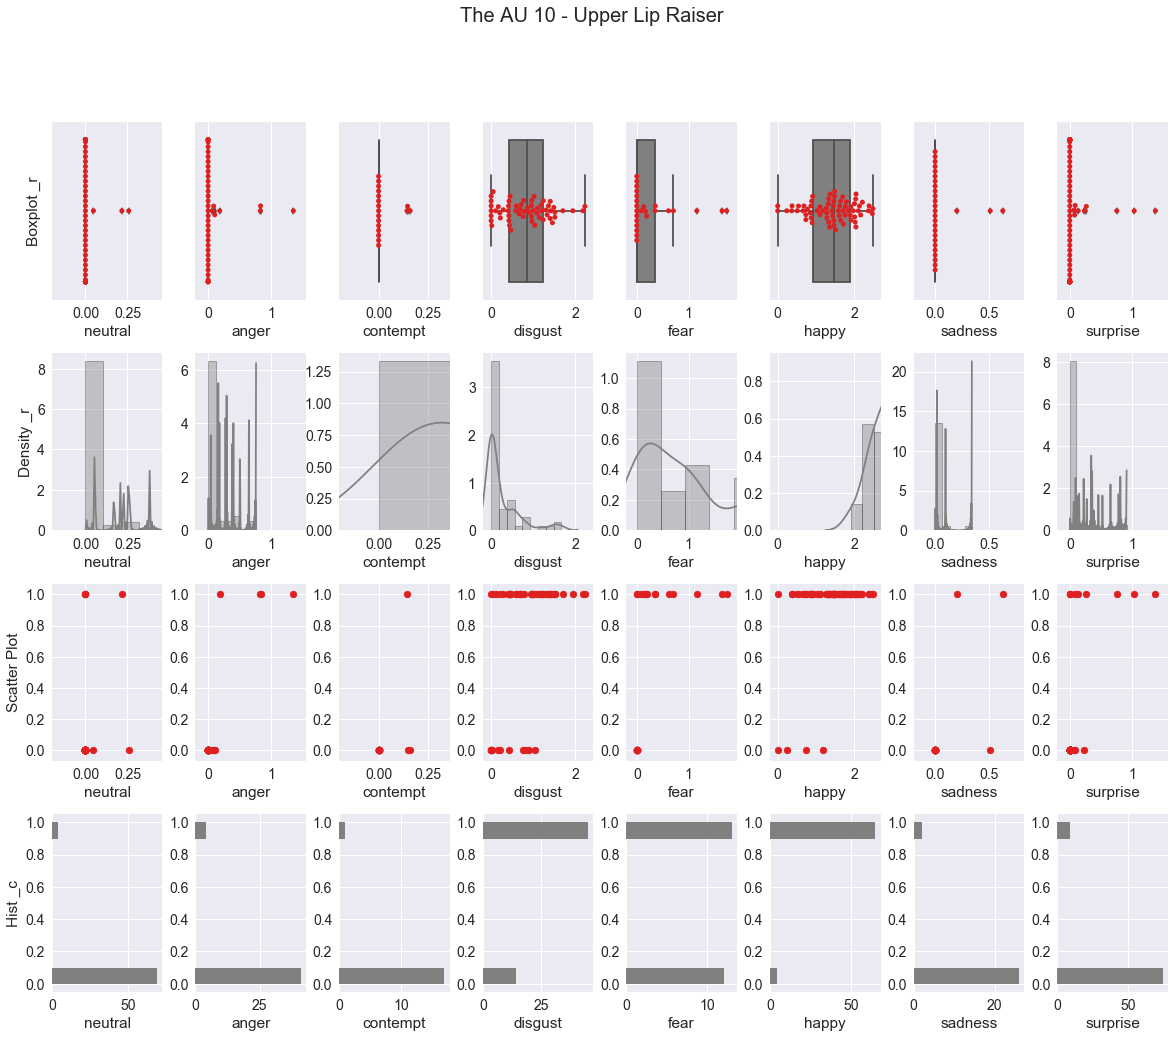

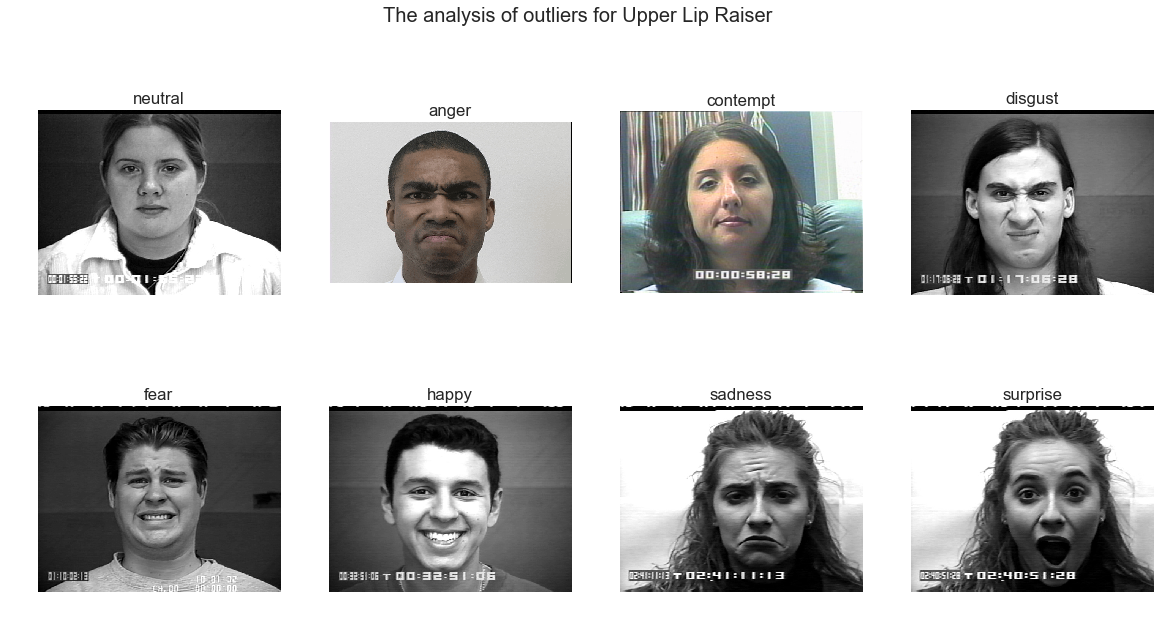

In [28]:
AU_analysis(4)

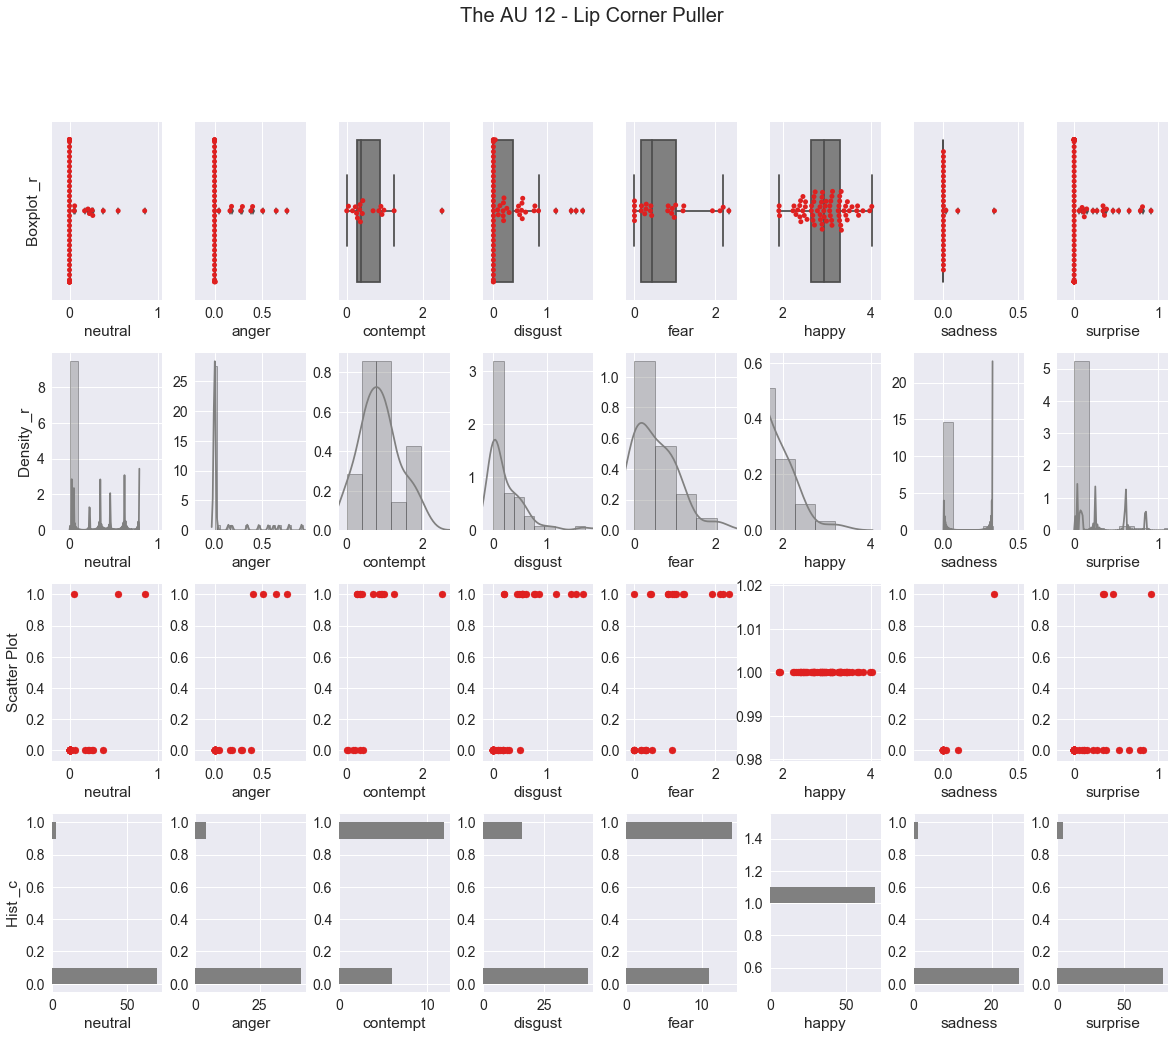

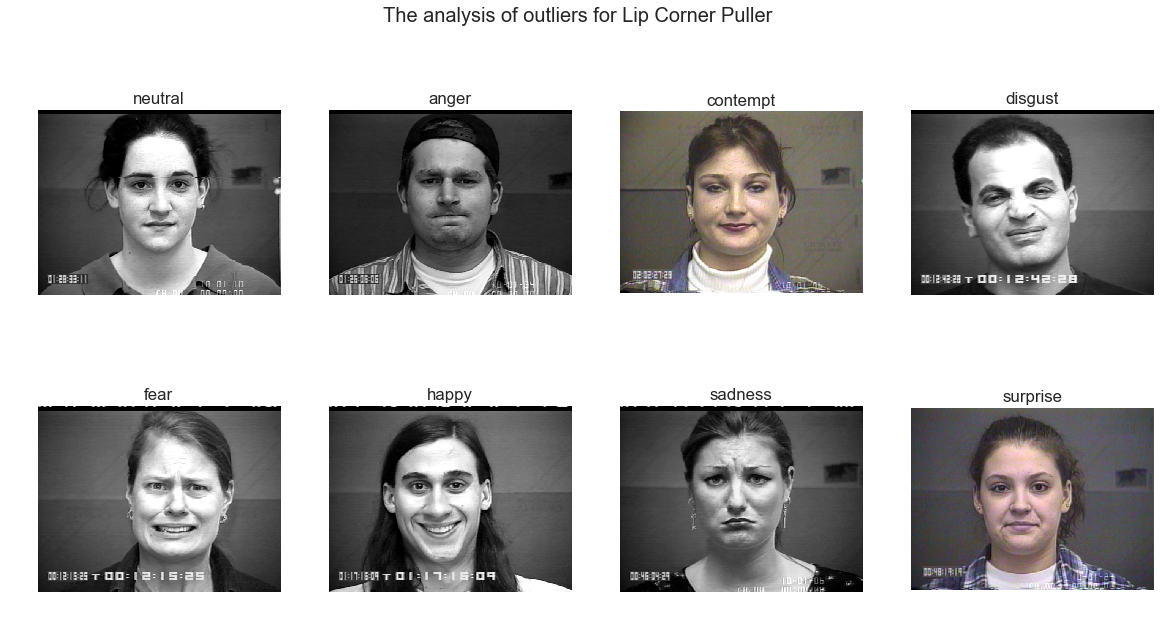

In [29]:
AU_analysis(5)

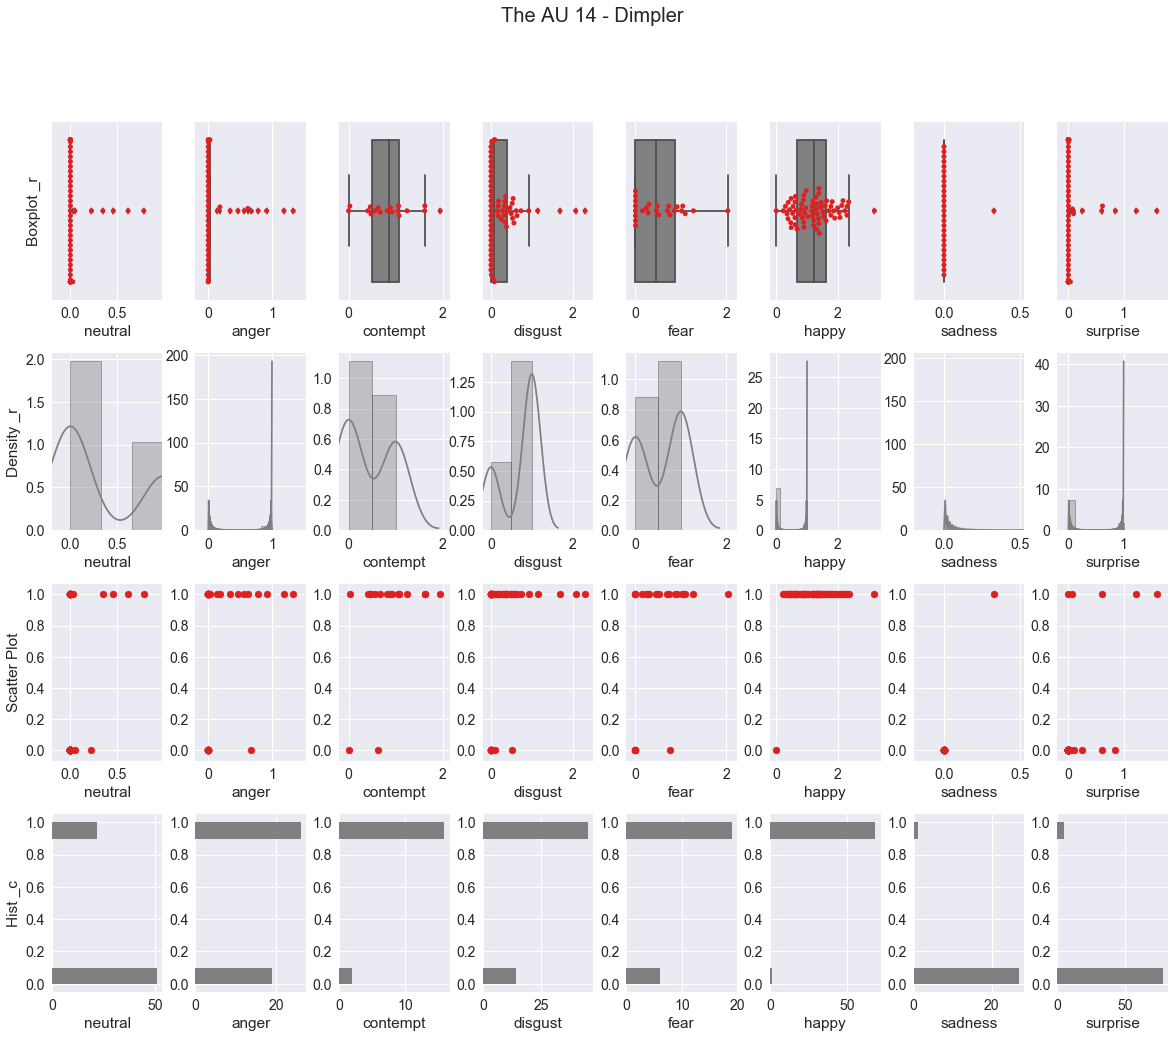

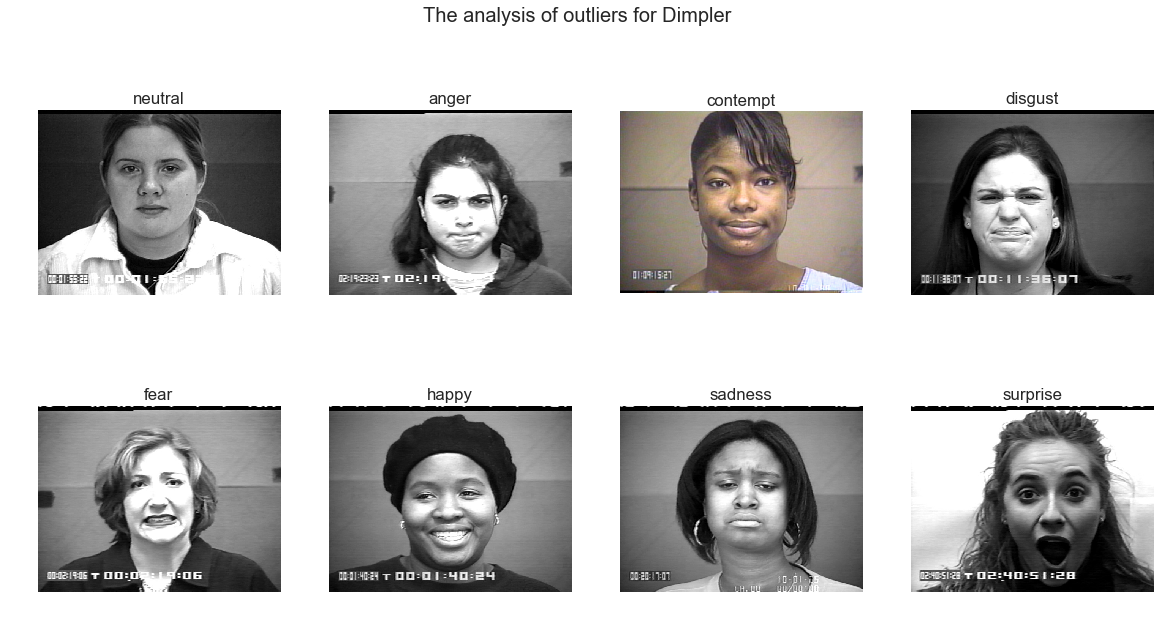

In [30]:
AU_analysis(6)

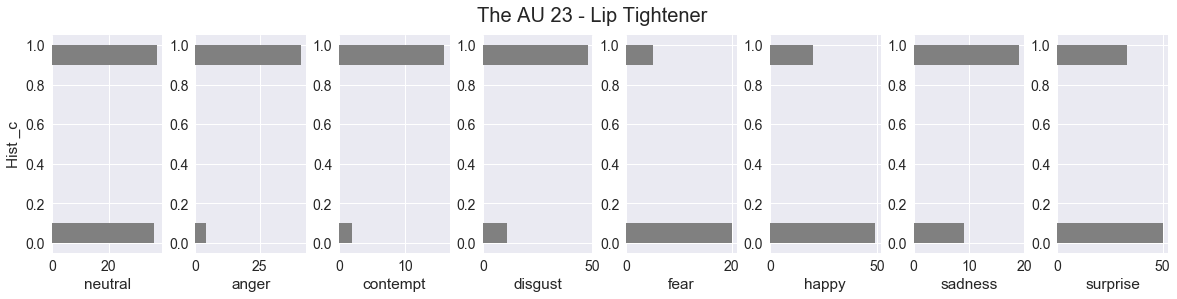

In [31]:
AU_analysis(7)

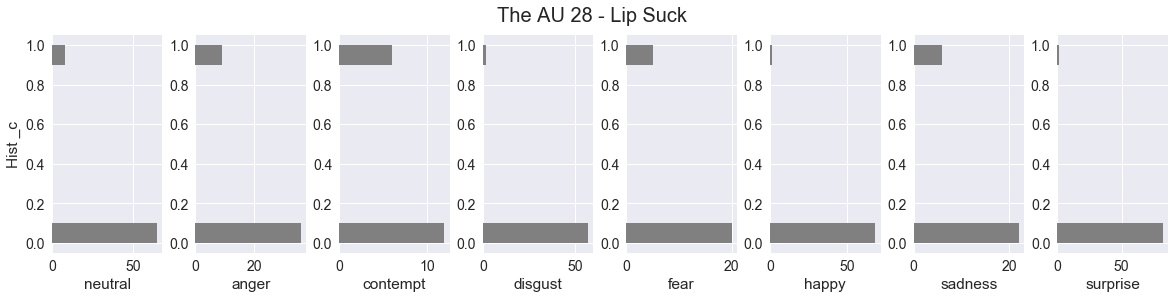

In [32]:
AU_analysis(8)

**Looking at outliers we can see that for every AU we can find emotions that we are not expected**

In [33]:
# AS WE NOTED THE DATASET IS NOT BALANCED
print(pd.value_counts(data_clean['emotion_label'], sort=False).sort_index())

0-neutral     73
1-anger       45
2-contempt    18
3-disgust     59
4-fear        25
5-happy       69
6-sadness     28
7-surprise    83
Name: emotion_label, dtype: int64


**Now we create some functions to help us to balance the dataset, to train the models and to evaluate the results**

In [61]:
# FUNCTION FOR EVERY EMOTION IN ORDER TO:
# 1) SPLIT THE EMOTION DATA INTO TRAINING AND TEST SAMPLES
# 2) USE BOOTSTRAP METHOD IN ORDER TO HAVE THE DESIRED NUMBER FOR TRAINING
def bootstrap_emo(data_clean_shuffle, df_ML, lp, i):
    
    print('\nFold number:',lp)
    print('Emotion:', emo_map[i])

    N_class = df_ML.iloc[i,0]
    N_class_train = int(df_ML.iloc[i,2])
    N_class_test = int(df_ML.iloc[i,1])
    l_index=lp*N_class_test
    r_index=(lp+1)*N_class_test

    print('Class Numerosity',N_class)
    print('Class Numerosity for train',N_class_train)
    print('Class Numerosity for test',N_class_test)
    print('l_index', l_index)
    print('r_index', r_index)
    emo = data_clean_shuffle[data_clean_shuffle.emotion == i]
    #print('all series emotion\n',emo.index)
    emo_test = emo[l_index:r_index]
    #print('type emo_test',type(emo_test))
    #print([ind not in list(emo_test.index) for ind in list(emo.index)])
    train_mask=[ind not in list(emo_test.index) for ind in list(emo.index)]
    emo_train = emo[train_mask]
    #print('train series emotion',emo_train.index)


    N_bt = int(df_ML.iloc[i,4])
    N_train = emo_train.shape[0]

    print('Emotion',emo_map[i])
    print('Nbr good for train: ',emo_train.shape)
    print('Nbr for train: ', N_bt)

    if N_train >= N_bt:
        print('Use subset')
        smpl=np.random.choice(np.arange(N_train), size=N_bt, replace = False)
    else:
        print('Start Bootstrap')
        print('remainder',(N_bt % N_train))
        print('replications',(N_bt // N_train))
        smpl=np.append(np.random.choice(np.arange(N_train), size=(N_bt % N_train), replace = False), np.array([x for x in range(N_train)]*(N_bt // N_train)))
        
    print('RESULT index sample')    
    print(smpl)
    print(smpl.shape)
    #print(emo_train.index)

    new_index=[x+'_'+str(i) for i,x in enumerate(list(emo_train.index[smpl]))]
    #print(new_index)

    emo_train_btstrap=pd.DataFrame(np.matrix(emo_train)[smpl,:], columns=emo_train.columns, index=new_index)
    #print(smpl)
    #print(emo_train_btstrap.head(2))
    #print(emo_train_btstrap.shape)

    return emo_test, emo_train, emo_train_btstrap

In [52]:
# FUNTION THAT BALANCES THE DATA AS WE WANT
def balanced_data(data_clean_shuffle, df_ML, lp):
    print('\n\n==========================================================')
    print('START THE PROCEDURE TO BALANCE THE DATASET FOR FOLD NUMBER:',lp)
    
    df_test_base, df_train_base, df_train_bt_base = bootstrap_emo(data_clean_shuffle, df_ML, lp , i=0)
    print('Bootstrap result for Emotion:', emo_map[0])
    print('For test: ',df_test_base.shape)
    print('For train: ',df_train_base.shape)
    print('For train after bootstrap: ',df_train_bt_base.shape)
    
    for i in np.arange(1,8):
        emo_test, emo_train, emo_train_bt = bootstrap_emo(data_clean_shuffle, df_ML, lp, i)
        print('Bootstrap result for Emotion:', emo_map[i])
        print('For test: ',emo_test.shape)
        print('For train: ',emo_train.shape)
        print('For train after bootstrap: ',emo_train_bt.shape)

        df_test_base = df_test_base.append(emo_test)
        df_train_base = df_train_base.append(emo_train)
        df_train_bt_base = df_train_bt_base.append(emo_train_bt)
        
        print('\nAfter append\n')
        print('For test: ',df_test_base.shape)
        print('For train: ',df_train_base.shape)
        print('For train after bootstrap: ',df_train_bt_base.shape)
    
    return df_test_base, df_train_base, df_train_bt_base

In [36]:
# FUNCTION THAT SPLIT THE DATA INTO INPUT AND OUTPUT VARIABLES
def splitXY(data):
    X = data[[col for col in data.columns.values if col[:2] == 'AU']]
    Y = data.emotion_label
    
    return X,Y

In [54]:
# ML TRAINING FOR SEVERAL MODELS THAT HAVE AS RESULT THE CONFUSION MATRIX
def ML_run(ML_models, df_train, df_test):
    X_train, Y_train = splitXY(df_train)
    print(X_train.shape)
    X_test, Y_test = splitXY(df_test)
    print(X_test.shape)
    labels_classes = class_numerosity.index
    
    conf_matrix_dic = {}
    
    for mdl in ML_models.keys():
        print('Run the model:',mdl)
        The_model = ML_models[mdl]
        The_model.fit(X_train, Y_train)
        
        The_model_pred = The_model.predict(X_test)
        print(classification_report(Y_test, The_model_pred))
        
        conf_matrix = confusion_matrix(Y_test, The_model_pred, labels=None, sample_weight=None)
        conf_matrix_dic[mdl] = conf_matrix
        print(conf_matrix)
    
    return conf_matrix_dic


In [138]:
# FUNCTION THAT CREATES EVALUATION METRICS, IN SPECIAL F1
def model_valuation(prim):
    #prim=M[list(M.keys())[1]]
    print(prim)
    perc = np.array(prim, dtype=np.float64)
    #perc = prim.copy()
    #perc.astype(np.float64)
    #print(perc)

    test_total_actual = np.sum(prim, axis=1)
    test_total_predicted = np.sum(prim, axis=0)
    total_test =np.sum(test_total_actual)
    print('Total actual: ',test_total_actual)
    print('Total predected: ',test_total_predicted)
    print('TOTAL: ', total_test)


    true_pos = test_total_actual.copy()*0
    false_pos = test_total_actual.copy()*0
    precision = np.array(test_total_actual.copy()*0, dtype=np.float64)
    recall = np.array(test_total_actual.copy()*0, dtype=np.float64)
    f1 = np.array(test_total_actual.copy()*0, dtype=np.float64)
    tpr = np.array(test_total_actual.copy()*0, dtype=np.float64)
    fpr = np.array(test_total_actual.copy()*0, dtype=np.float64)

    for i in range(len(test_total)):
        true_pos[i] = prim[i,i]
        false_pos[i] = test_total_predicted[i] - prim[i,i]

        precision[i] = true_pos[i] / test_total_predicted[i]
        recall[i] = true_pos[i] / test_total_actual[i]
        f1[i] = 2*precision[i]*recall[i]/ (precision[i] + recall[i])

        tpr[i] = true_pos[i]/ test_total_actual[i]
        fpr[i] = false_pos[i]/ (total_test - test_total_actual[i])

        perc[i,] = np. round_(perc[i,]*100/test_total_actual[i],1)

    print('True Positive: ',true_pos)
    print('False Positive: ',false_pos)
    print('Precision: ',precision)
    print('Recall: ',recall)
    print('F1: ',f1)
    print('Tpr:',np.round_(tpr*100,1))
    print('Fpr:',np.round_(fpr*100,1))

    print('Perc matrix: \n',perc)

    return f1

In [159]:
# FUNCTION THAT USE THE FOLD METHOD FOR TRAINING
def MLtrain_folds(data_clean, ML_models, test_fraction = 0.2, train_weights=np.array([1, 1 , 1 , 1, 1, 1, 1, 1]),N_desired=50):

    class_numerosity = pd.value_counts(data_clean['emotion_label'], sort=False).sort_index()

    df_ML = pd.DataFrame(np.array(class_numerosity), columns = ['Class Numerosity'], index = class_numerosity.index)
    df_ML['Numerosity Test']= np.round(class_numerosity*test_fraction)
    df_ML['Numerosity good for Train']= np.round(class_numerosity*(1-test_fraction))
    df_ML['Class weights for Train']=train_weights
    df_ML['Train Numerosity after Bootstrap']= np.round(train_weights*N_desired)
    print(df_ML)
    print('\nNumber of folds:', int(1/test_fraction))


    random.seed(1234)
    data_clean_shuffle = shuffle(data_clean)

    print('Nbr of folds',int(1/test_fraction))

    ML_folds = {}

    for fold_nbr in range(int(1/test_fraction)):
        df_test, df_train, df_train_bt = balanced_data(data_clean_shuffle, df_ML, lp=fold_nbr)
        ML_folds['Fold Nbr '+str(fold_nbr)] = ML_run(ML_models, df_train_bt, df_test)

    M = {}
    for mdl in ML_models.keys():
        M[mdl] = 0

    for fld in ML_folds.keys():
        #print(fld)
        for mdl in ML_folds[fld].keys():
            #print(mdl)
            M[mdl] += ML_folds[fld][mdl]

    f1={}
    for mdl in M.keys():
        f1[mdl] = model_valuation(M[mdl])  

    return(f1)

# ML training and result analysis

In [244]:
# ML TRAINING AND TEST FOR 3 MODELS
ML_models = {'Tree': DecisionTreeClassifier(),
             'KNN': KNeighborsClassifier(),
             'RNF': RandomForestClassifier()
            }

N_list=[]
f1_list= []

nbr_col = 3
nbr_row = 3
N_min = 15
N_max = 80

for i in range(nbr_col*nbr_row):
        N_desired = int(N_min + (N_max-N_min)*i/(nbr_col*nbr_row-1))
        N_list.append(N_desired)
        f1_list.append(MLtrain_folds(data_clean, ML_models, test_fraction = 0.2,
                      train_weights=np.array([1, 1 , 1 , 1, 1, 1, 1, 1]), N_desired=N_desired))


            Class Numerosity  Numerosity Test  Numerosity good for Train  \
0-neutral                 73             15.0                       58.0   
1-anger                   45              9.0                       36.0   
2-contempt                18              4.0                       14.0   
3-disgust                 59             12.0                       47.0   
4-fear                    25              5.0                       20.0   
5-happy                   69             14.0                       55.0   
6-sadness                 28              6.0                       22.0   
7-surprise                83             17.0                       66.0   

            Class weights for Train  Train Numerosity after Bootstrap  
0-neutral                         1                                15  
1-anger                           1                                15  
2-contempt                        1                                15  
3-disgust                  

Nbr good for train:  (55, 17)
Nbr for train:  15
Use subset
RESULT index sample
[30 21 35  9  1 52 40 19  5 47  7 37 51 43 16]
(15,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (15, 17)

After append

For test:  (59, 17)
For train:  (230, 17)
For train after bootstrap:  (90, 17)

Fold number: 1
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for test 6
l_index 6
r_index 12
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  15
Use subset
RESULT index sample
[11  8 20 14 19  5 21  3  4  2  6  7 15 16 10]
(15,)
Bootstrap result for Emotion: sadness
For test:  (6, 17)
For train:  (22, 17)
For train after bootstrap:  (15, 17)

After append

For test:  (65, 17)
For train:  (252, 17)
For train after bootstrap:  (105, 17)

Fold number: 1
Emotion: surprise
Class Numerosity 83
Class Numerosity for train 66
Class Numerosity for test 17
l_index 17
r_index 34
Emotion surprise
Nbr good for tra

 [ 6  0  1  0  0  0  5  5]]
Run the model: KNN
             precision    recall  f1-score   support

  0-neutral       0.33      0.40      0.36        15
    1-anger       0.62      0.56      0.59         9
 2-contempt       0.38      0.75      0.50         4
  3-disgust       1.00      0.83      0.91        12
     4-fear       0.50      0.20      0.29         5
    5-happy       0.86      0.86      0.86        14
  6-sadness       0.29      0.33      0.31         6
 7-surprise       0.60      0.53      0.56        17

avg / total       0.62      0.59      0.59        82

[[ 6  1  0  0  1  0  3  4]
 [ 3  5  0  0  0  0  1  0]
 [ 1  0  3  0  0  0  0  0]
 [ 1  0  0 10  0  1  0  0]
 [ 0  0  2  0  1  1  0  1]
 [ 0  0  2  0  0 12  0  0]
 [ 1  2  0  0  0  0  2  1]
 [ 6  0  1  0  0  0  1  9]]
Run the model: RNF
             precision    recall  f1-score   support

  0-neutral       0.62      0.33      0.43        15
    1-anger       1.00      0.56      0.71         9
 2-contempt       0.44  

Emotion: anger
Class Numerosity 45
Class Numerosity for train 36
Class Numerosity for test 9
l_index 36
r_index 45
Emotion anger
Nbr good for train:  (36, 17)
Nbr for train:  15
Use subset
RESULT index sample
[30 33  0 35 28 24  7  4  9 16  6 21  3 20  1]
(15,)
Bootstrap result for Emotion: anger
For test:  (9, 17)
For train:  (36, 17)
For train after bootstrap:  (15, 17)

After append

For test:  (22, 17)
For train:  (96, 17)
For train after bootstrap:  (30, 17)

Fold number: 4
Emotion: contempt
Class Numerosity 18
Class Numerosity for train 14
Class Numerosity for test 4
l_index 16
r_index 20
Emotion contempt
Nbr good for train:  (16, 17)
Nbr for train:  15
Use subset
RESULT index sample
[ 2 15  3  4  6 13 14  1  8 11  5  9 12  7 10]
(15,)
Bootstrap result for Emotion: contempt
For test:  (2, 17)
For train:  (16, 17)
For train after bootstrap:  (15, 17)

After append

For test:  (24, 17)
For train:  (112, 17)
For train after bootstrap:  (45, 17)

Fold number: 4
Emotion: disgust
Class

Class Numerosity for train 55
Class Numerosity for test 14
l_index 0
r_index 14
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  23
Use subset
RESULT index sample
[ 4  0 45  9  1 21 54 37 51 50  8 19  6 42 40 18 48  2 47 27 32 15 36]
(23,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (23, 17)

After append

For test:  (59, 17)
For train:  (230, 17)
For train after bootstrap:  (138, 17)

Fold number: 0
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for test 6
l_index 0
r_index 6
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  23
Start Bootstrap
remainder 1
replications 1
RESULT index sample
[ 0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(23,)
Bootstrap result for Emotion: sadness
For test:  (6, 17)
For train:  (22, 17)
For train after bootstrap:  (23, 17)

After append

For test:  (65, 17)
For train:  (252, 17)
For train after bootstrap:  (161

For train after bootstrap:  (46, 17)

Fold number: 3
Emotion: contempt
Class Numerosity 18
Class Numerosity for train 14
Class Numerosity for test 4
l_index 12
r_index 16
Emotion contempt
Nbr good for train:  (14, 17)
Nbr for train:  23
Start Bootstrap
remainder 9
replications 1
RESULT index sample
[ 2  1  7  6  5 13  3  4 12  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
(23,)
Bootstrap result for Emotion: contempt
For test:  (4, 17)
For train:  (14, 17)
For train after bootstrap:  (23, 17)

After append

For test:  (28, 17)
For train:  (108, 17)
For train after bootstrap:  (69, 17)

Fold number: 3
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 36
r_index 48
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  23
Use subset
RESULT index sample
[18 42 31  6 43 14 22 40 37  0 30  9 12  5 19 38 36 29 20 39 11  4  1]
(23,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap: 

Class Numerosity for train 20
Class Numerosity for test 5
l_index 0
r_index 5
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  31
Start Bootstrap
remainder 11
replications 1
RESULT index sample
[15 18  5  2  8  6  0 19 12 11 14  0  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17 18 19]
(31,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (31, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (155, 17)

Fold number: 0
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 0
r_index 14
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  31
Use subset
RESULT index sample
[31  8 17 46  1 18  7 35 49 22 10 19 11 34  2 30 45 26 42 47 13 14 25 50 40
 54  4 53  9 32 43]
(31,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (31, 17)

After append

For test:  (59, 17)
For train: 

Fold number: 3
Emotion: contempt
Class Numerosity 18
Class Numerosity for train 14
Class Numerosity for test 4
l_index 12
r_index 16
Emotion contempt
Nbr good for train:  (14, 17)
Nbr for train:  31
Start Bootstrap
remainder 3
replications 2
RESULT index sample
[ 9  3  2  0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7
  8  9 10 11 12 13]
(31,)
Bootstrap result for Emotion: contempt
For test:  (4, 17)
For train:  (14, 17)
For train after bootstrap:  (31, 17)

After append

For test:  (28, 17)
For train:  (108, 17)
For train after bootstrap:  (93, 17)

Fold number: 3
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 36
r_index 48
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  31
Use subset
RESULT index sample
[21  5  8 44 28  7  4 38  9 42 32  3 14 16 43 10 37 33  1 13 41 25 18 15 20
 23 30 45 12 46 35]
(31,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after

Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 0
r_index 5
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  39
Start Bootstrap
remainder 19
replications 1
RESULT index sample
[17  0 10 12  5  3 19 14  1  7  6 11  9  2  4 16 13 15  8  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(39,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (39, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (195, 17)

Fold number: 0
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 0
r_index 14
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  39
Use subset
RESULT index sample
[50 38  7 46 12 28 29 32 35 39 47 19 13 42 37 49  4 14  0 52  5 40 17  3 30
 25 18 44  8  2 21 51  1 10 41 22 26  6 24]
(39,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after

For test:  (28, 17)
For train:  (108, 17)
For train after bootstrap:  (117, 17)

Fold number: 3
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 36
r_index 48
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  39
Use subset
RESULT index sample
[ 0 46 21 45 39 23 35 40  2  9 16 10 32 28  4 41 24 27 43 33 11 14 38 15 42
 22 29 36  7  3 34  8 31 44 37 19  6 13 17]
(39,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (39, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (156, 17)

Fold number: 3
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 15
r_index 20
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  39
Start Bootstrap
remainder 19
replications 1
RESULT index sample
[ 3 12  9 17 18  4  6 14  2 15 16  7  1 11  5 10  8 19  0  0  1  2  3  4  5
  6  7  8  9 10 11 12

For train after bootstrap:  (141, 17)

Fold number: 0
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 0
r_index 12
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  47
Use subset
RESULT index sample
[ 9 19 26 32 44 23 46 45 20  3 42  6  2 43  8 13 27 15 40 25 10 38 39 30 22
  0 33 29 11  1 14 36 12 37  7 16 31  5 28  4 21 34 41 24 35 18 17]
(47,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (47, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (188, 17)

Fold number: 0
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 0
r_index 5
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  47
Start Bootstrap
remainder 7
replications 2
RESULT index sample
[14 11  8  0  9  1 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19  0  1  2  3  4  5  6  7  8  9 10 11 

Class Numerosity for train 22
Class Numerosity for test 6
l_index 12
r_index 18
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  47
Start Bootstrap
remainder 3
replications 2
RESULT index sample
[13 17  3  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(47,)
Bootstrap result for Emotion: sadness
For test:  (6, 17)
For train:  (22, 17)
For train after bootstrap:  (47, 17)

After append

For test:  (65, 17)
For train:  (252, 17)
For train after bootstrap:  (329, 17)

Fold number: 2
Emotion: surprise
Class Numerosity 83
Class Numerosity for train 66
Class Numerosity for test 17
l_index 34
r_index 51
Emotion surprise
Nbr good for train:  (66, 17)
Nbr for train:  47
Use subset
RESULT index sample
[15 23 56 45 35 25 16 36 48  2 38 53 54 52 19  0  5  3 46 55  7  6 31 64 61
 29 17 43 40  8 62 44  4 49 33 65 59 10  1 34 57 20 12 30 32 21 47]
(47,)
Bootstrap result for Emotion: surprise
For test:  

Total predected:  [75 46 24 51 19 70 38 77]
TOTAL:  400
True Positive:  [29 22 10 46  8 66  8 43]
False Positive:  [46 24 14  5 11  4 30 34]
Precision:  [ 0.38666667  0.47826087  0.41666667  0.90196078  0.42105263  0.94285714
  0.21052632  0.55844156]
Recall:  [ 0.39726027  0.48888889  0.55555556  0.77966102  0.32        0.95652174
  0.28571429  0.51807229]
F1:  [ 0.39189189  0.48351648  0.47619048  0.83636364  0.36363636  0.94964029
  0.24242424  0.5375    ]
Tpr: [ 39.7  48.9  55.6  78.   32.   95.7  28.6  51.8]
Fpr: [ 14.1   6.8   3.7   1.5   2.9   1.2   8.1  10.7]
Perc matrix: 
 [[ 39.7   8.2   4.1   0.    2.7   0.   16.4  28.8]
 [ 15.6  48.9   2.2   8.9   2.2   0.   17.8   4.4]
 [  5.6  11.1  55.6   0.    0.   11.1   5.6  11.1]
 [  1.7   8.5   1.7  78.    3.4   0.    5.1   1.7]
 [ 12.   12.   12.    4.   32.    8.    4.   16. ]
 [  0.    0.    0.    0.    4.3  95.7   0.    0. ]
 [ 21.4  28.6   7.1   0.    0.    0.   28.6  14.3]
 [ 33.7   0.    4.8   0.    3.6   0.    6.   51.8]]
[[

C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(47, 17)
Nbr for train:  55
Start Bootstrap
remainder 8
replications 1
RESULT index sample
[27  5 38 43 16  4  0 46  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46]
(55,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (55, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (220, 17)

Fold number: 1
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 5
r_index 10
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  55
Start Bootstrap
remainder 15
replications 2
RESULT index sample
[ 1 16 15 17  9  4 14  2 11 18  5  8 19  3  6  0  1  2  3  4  5  6  7  8  9
 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19]
(55,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bo

For train after bootstrap:  (165, 17)

Fold number: 3
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 36
r_index 48
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  55
Start Bootstrap
remainder 8
replications 1
RESULT index sample
[46  1 13  9 28 25 45 26  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46]
(55,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (55, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (220, 17)

Fold number: 3
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 15
r_index 20
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  55
Start Bootstrap
remainder 15
replications 2
RESULT index sample
[16 11  2  8 12  5  7  6 10  0 14  1 13  3  4  0  1  2  3 

Run the model: KNN
             precision    recall  f1-score   support

  0-neutral       0.21      0.20      0.21        15
    1-anger       0.58      0.78      0.67         9
 2-contempt       0.50      0.75      0.60         4
  3-disgust       1.00      0.75      0.86        12
     4-fear       0.43      0.60      0.50         5
    5-happy       0.88      1.00      0.93        14
  6-sadness       0.40      0.67      0.50         6
 7-surprise       0.38      0.18      0.24        17

avg / total       0.56      0.56      0.54        82

[[ 3  2  1  0  2  0  2  5]
 [ 0  7  0  0  0  0  2  0]
 [ 0  0  3  0  0  1  0  0]
 [ 0  1  0  9  1  1  0  0]
 [ 1  1  0  0  3  0  0  0]
 [ 0  0  0  0  0 14  0  0]
 [ 0  1  1  0  0  0  4  0]
 [10  0  1  0  1  0  2  3]]
Run the model: RNF
             precision    recall  f1-score   support

  0-neutral       0.57      0.53      0.55        15
    1-anger       0.67      0.44      0.53         9
 2-contempt       0.20      0.25      0.22         4

             precision    recall  f1-score   support

  0-neutral       0.38      0.33      0.36        15
    1-anger       0.40      0.44      0.42         9
 2-contempt       0.50      0.50      0.50         4
  3-disgust       1.00      0.58      0.74        12
     4-fear       0.30      0.60      0.40         5
    5-happy       1.00      1.00      1.00        14
  6-sadness       0.31      0.67      0.42         6
 7-surprise       0.64      0.41      0.50        17

avg / total       0.63      0.56      0.57        82

[[ 5  0  1  0  3  0  3  3]
 [ 1  4  1  0  1  0  2  0]
 [ 1  0  2  0  0  0  1  0]
 [ 0  4  0  7  1  0  0  0]
 [ 1  1  0  0  3  0  0  0]
 [ 0  0  0  0  0 14  0  0]
 [ 0  1  0  0  0  0  4  1]
 [ 5  0  0  0  2  0  3  7]]
Run the model: RNF
             precision    recall  f1-score   support

  0-neutral       0.43      0.40      0.41        15
    1-anger       0.40      0.44      0.42         9
 2-contempt       0.67      0.50      0.57         4
  3-disgust       

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (284, 17)

Fold number: 1
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 5
r_index 10
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  71
Start Bootstrap
remainder 11
replications 3
RESULT index sample
[ 3  6 17  5 12 10  7 14 11 16  1  0  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(71,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (71, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (355, 17)

Fold number: 1
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 14
r_index 28
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  71
Start Bootstrap
remainder 16
replication

Class Numerosity for test 15
l_index 60
r_index 75
Emotion neutral
Nbr good for train:  (60, 17)
Nbr for train:  71
Start Bootstrap
remainder 11
replications 1
RESULT index sample
[45 29 26 15 37 31 24 17 48 44 21  0  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
(71,)
Bootstrap result for Emotion: neutral
For test:  (13, 17)
For train:  (60, 17)
For train after bootstrap:  (71, 17)

Fold number: 4
Emotion: anger
Class Numerosity 45
Class Numerosity for train 36
Class Numerosity for test 9
l_index 36
r_index 45
Emotion anger
Nbr good for train:  (36, 17)
Nbr for train:  71
Start Bootstrap
remainder 35
replications 1
RESULT index sample
[ 6 17 18 33 29  9 35  1 26 24  0  4 14  5 19 23 16 30 28 10 12 32 20 22 11
  8 34 13  2 31 25  3 15 21  7  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
(71,)


Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 14
r_index 28
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  80
Start Bootstrap
remainder 25
replications 1
RESULT index sample
[ 1  4  0 54 34 43 35 12 49 11 22  6 30 13 47 39 45 46  8 14 26 28 38 33 25
  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54]
(80,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (80, 17)

After append

For test:  (59, 17)
For train:  (230, 17)
For train after bootstrap:  (480, 17)

Fold number: 1
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for test 6
l_index 6
r_index 12
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  80
Start Bootstrap
remainder 14
replications 3
RESULT index sample
[ 9  5  7 14  3  8 19 21  6  0 13 11

Emotion anger
Nbr good for train:  (36, 17)
Nbr for train:  80
Start Bootstrap
remainder 8
replications 2
RESULT index sample
[10 18  0 14 30 32 12 35  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35]
(80,)
Bootstrap result for Emotion: anger
For test:  (9, 17)
For train:  (36, 17)
For train after bootstrap:  (80, 17)

After append

For test:  (22, 17)
For train:  (96, 17)
For train after bootstrap:  (160, 17)

Fold number: 4
Emotion: contempt
Class Numerosity 18
Class Numerosity for train 14
Class Numerosity for test 4
l_index 16
r_index 20
Emotion contempt
Nbr good for train:  (16, 17)
Nbr for train:  80
Start Bootstrap
remainder 0
replications 5
RESULT index sample
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15  0  1
 

C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


i= 0
j 0
i= 0
j 1
i= 0
j 2
i= 1
j 0
i= 1
j 1
i= 1
j 2
i= 2
j 0
i= 2
j 1
i= 2
j 2


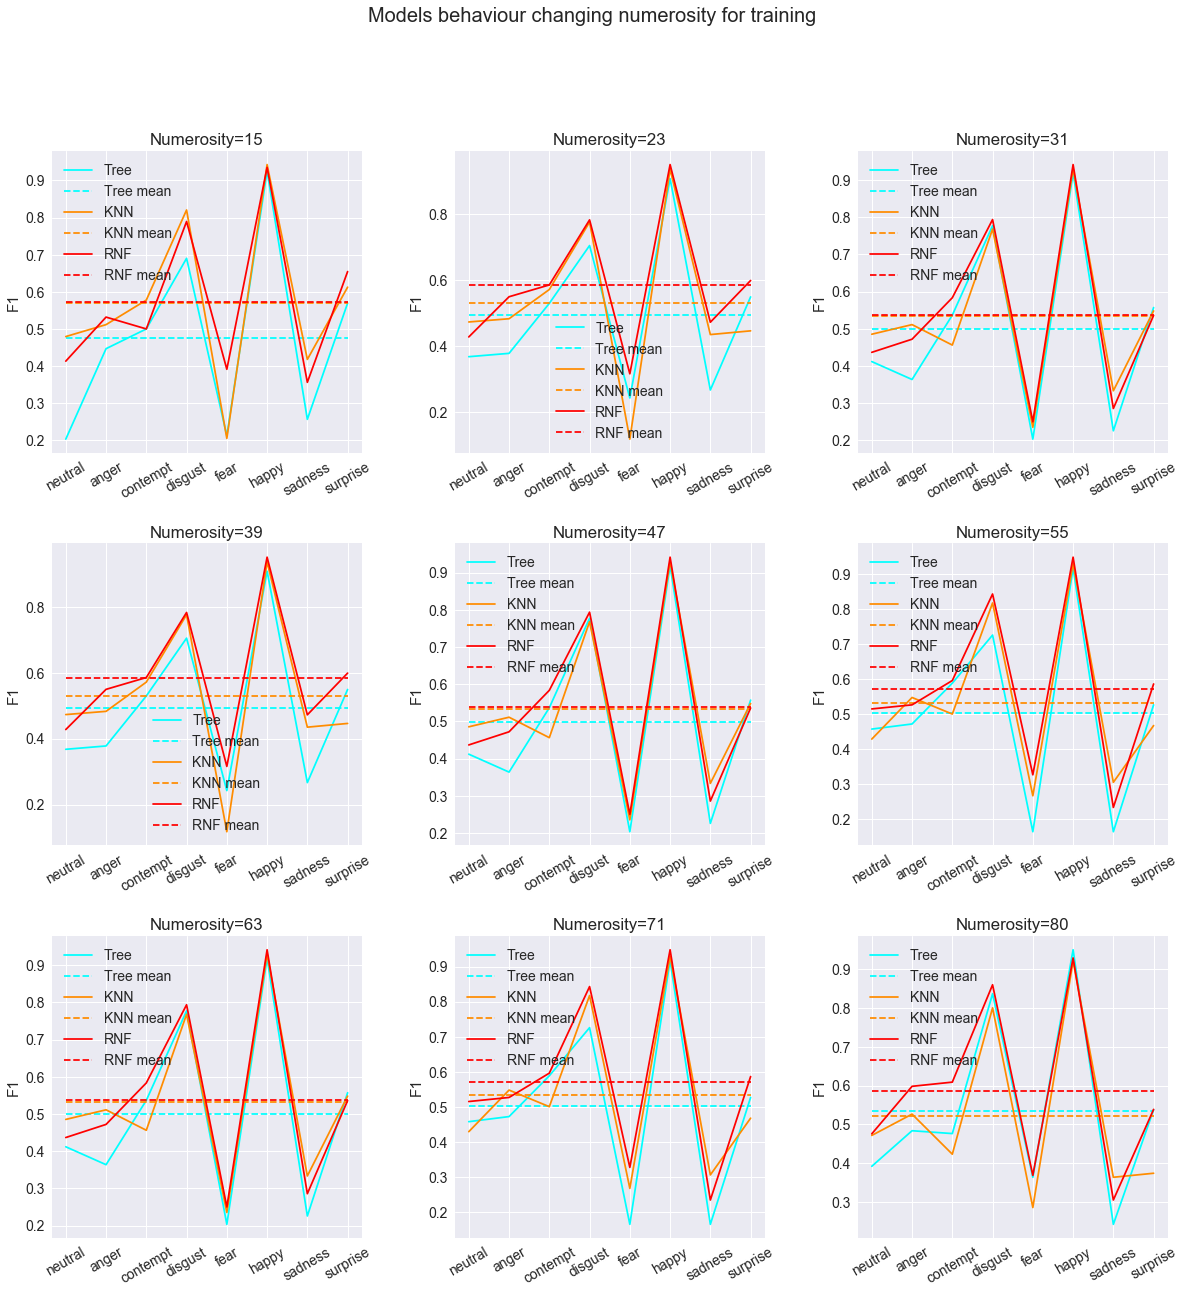

In [252]:
# CREATE PLOTS TO DISPLAY THE RESULTS
colors = {'Tree':'aqua',
          'KNN':'darkorange',
          'RNF': 'red'
         }

fig, axes = plt.subplots(nbr_row, nbr_col, figsize=(20,7*nbr_row))
fig_title = 'Models behaviour changing numerosity for training'
fig.suptitle(fig_title, fontsize=20)
fig.subplots_adjust(wspace=.3, hspace=.3)

for k in range(nbr_row*nbr_col):
    j=k%nbr_col
    i=k//nbr_row
    #print('i=',i)
    #print('j',j)
    ax = axes[i,j]
    f1= f1_list[i+j]

    for mdl in f1.keys():
        _=ax.plot(f1[mdl], color = colors[mdl], linestyle='-' , label=mdl)
        _=ax.plot(np.ones(len(f1[mdl]))*np.mean(f1[mdl]), color = colors[mdl], linestyle='--', label=mdl+' mean')

    ticks = ax.set_xticks(list(emo_map.keys()))
    labels = ax.set_xticklabels(list(emo_map.values()), rotation=30)#, fontsize='small')
    _ = ax.set_title('Numerosity='+str(N_list[k]))
    #_ = ax.set_xlabel('Emotions');
    _ = ax.set_ylabel('F1')
    _ = ax.legend(loc="best")
plt.show()

**Note that:**
- RNF is the best model for our purpose
- the emotions Disgust and Happiness are the overperformed emotions
- the emotions Fear and Sadness are the underperformed emotions
- the best N = 23, 39, 80

At the next step we will take into consideration the best numerosities and will tune the weights of overperformed and underperformed emotions

In [271]:
# TRAIN AND TEST THE 3 MODELS CHANGING NUMEROSITY AND WEIGHTS
ML_models = {'Tree': DecisionTreeClassifier(),
             'KNN': KNeighborsClassifier(),
             'RNF': RandomForestClassifier()
            }

weights_list= [np.array([1, 1 , 1 , 1, 1.2, 1, 1.2, 1]),
             np.array([1, 1 , 1 , 0.8, 1, 0.8, 1, 1]),
             np.array([1, 1 , 1 , 0.8, 1.2, 0.8, 1.2, 1]),
             np.array([1, 1 , 1 , 0.9, 1.1, 0.9, 1.1, 1])]
N_list = [23,39,80]
f1_list= []

nbr_col = len(N_list)
nbr_row = len(weights_list)
print('row',nbr_row)
print('col',nbr_col)

for k in range(nbr_col*nbr_row):
    j=k%nbr_col
    i=k//(nbr_row-1)
    #print('i=',i)
    #print('j=',j)
    print(N_list[j])
    print(weights_list[i])
    f1_list.append(MLtrain_folds(data_clean, ML_models, test_fraction = 0.2,
                  train_weights=weights_list[i], N_desired=N_list[j]))

row 4
col 3
23
[ 1.   1.   1.   1.   1.2  1.   1.2  1. ]
            Class Numerosity  Numerosity Test  Numerosity good for Train  \
0-neutral                 73             15.0                       58.0   
1-anger                   45              9.0                       36.0   
2-contempt                18              4.0                       14.0   
3-disgust                 59             12.0                       47.0   
4-fear                    25              5.0                       20.0   
5-happy                   69             14.0                       55.0   
6-sadness                 28              6.0                       22.0   
7-surprise                83             17.0                       66.0   

            Class weights for Train  Train Numerosity after Bootstrap  
0-neutral                       1.0                              23.0  
1-anger                         1.0                              23.0  
2-contempt                      1.0       

Nbr for train:  28
Start Bootstrap
remainder 8
replications 1
RESULT index sample
[ 3  9 13  8  0 19  2  1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19]
(28,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (28, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (120, 17)

Fold number: 1
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 14
r_index 28
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  23
Use subset
RESULT index sample
[ 5  3 28 26 33 34 40 35 22 45 47 53  9 38 39 17 20 23 27 10 48 37 36]
(23,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (23, 17)

After append

For test:  (59, 17)
For train:  (230, 17)
For train after bootstrap:  (143, 17)

Fold number: 1
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for te

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (120, 17)

Fold number: 3
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 42
r_index 56
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  23
Use subset
RESULT index sample
[32 23 31 47 34 53 52  6 39 38 44 25 37  9 19 41  2 42 20 45 24 50  3]
(23,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (23, 17)

After append

For test:  (59, 17)
For train:  (230, 17)
For train after bootstrap:  (143, 17)

Fold number: 3
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for test 6
l_index 18
r_index 24
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  28
Start Bootstrap
remainder 6
replications 1
RESULT index sample
[20 15 13  4 14 21  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 20 21]
(28,)
Bootstrap result for Emotion: sadness
For test:  (6, 1

Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (39, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (156, 17)

Fold number: 1
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 5
r_index 10
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  47
Start Bootstrap
remainder 7
replications 2
RESULT index sample
[15 11 16  6  5  3 13  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(47,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (47, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (203, 17)

Fold number: 1
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 14
r_index 28
Emotion happy
Nbr good for train:  (55, 17)
Nb

C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Bootstrap result for Emotion: disgust
For test:  (11, 17)
For train:  (48, 17)
For train after bootstrap:  (39, 17)

After append

For test:  (35, 17)
For train:  (160, 17)
For train after bootstrap:  (156, 17)

Fold number: 4
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 20
r_index 25
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  47
Start Bootstrap
remainder 7
replications 2
RESULT index sample
[13 11 16 15 10 14  1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(47,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (47, 17)

After append

For test:  (40, 17)
For train:  (180, 17)
For train after bootstrap:  (203, 17)

Fold number: 4
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 56
r_index 70
Emotion happy
Nbr good for train:  (56, 17)


  9 10 11 12 13]
(80,)
Bootstrap result for Emotion: contempt
For test:  (4, 17)
For train:  (14, 17)
For train after bootstrap:  (80, 17)

After append

For test:  (28, 17)
For train:  (108, 17)
For train after bootstrap:  (240, 17)

Fold number: 2
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 24
r_index 36
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  80
Start Bootstrap
remainder 33
replications 1
RESULT index sample
[44 32 28 19 15 37 18 11  8 39 33 38 10 36  4 22  1 21 17 20  6 34 24 46 29
 27 16 12 40  2 13 35 31  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46]
(80,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (80, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (320, 17)

Fold number: 2
Emotion: fear
Class Numer

C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 4
Emotion: surprise
Class Numerosity 83
Class Numerosity for train 66
Class Numerosity for test 17
l_index 68
r_index 85
Emotion surprise
Nbr good for train:  (68, 17)
Nbr for train:  80
Start Bootstrap
remainder 12
replications 1
RESULT index sample
[34 17 66 11 50  2 30  1 32 15 63 61  0  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67]
(80,)
Bootstrap result for Emotion: surprise
For test:  (15, 17)
For train:  (68, 17)
For train after bootstrap:  (80, 17)

After append

For test:  (72, 17)
For train:  (328, 17)
For train after bootstrap:  (672, 17)
(672, 15)
(72, 15)
Run the model: Tree
             precision    recall  f1-score   support

  0-neutral       0.27      0.23      0.25        13
    1-anger       0.38      0.33      0.35         9
 2-contempt       0.40      1.00      0.57         2
  3-disgust       0.89      0.73 

Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  23
Start Bootstrap
remainder 3
replications 1
RESULT index sample
[ 5  4 18  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(23,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (23, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (110, 17)

Fold number: 2
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 28
r_index 42
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  18
Use subset
RESULT index sample
[41 40 54  1  2  0 29  3 23 21 22 24 30 19 35 31 16 33]
(18,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (18, 17)

After append

For test:  (59, 17)
For train:  (230, 17)
For train after bootstrap:  (128, 17)

Fold number: 2
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numer

C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



[20 10 33 43 15 22 36  5 18 11 21  8 45 40 25 44  7 38 31 14  3 29  1 37 30
 23 12 35 42  6 41]
(31,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (31, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (148, 17)

Fold number: 0
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 0
r_index 5
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  39
Start Bootstrap
remainder 19
replications 1
RESULT index sample
[18  5  7  4  9  0 12  6 16 17 14  1 10  2 19 15  3 11  8  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(39,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (39, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
For train after bootstrap:  (187, 17)

Fold number: 0
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity f

C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nbr for train:  39
Start Bootstrap
remainder 11
replications 2
RESULT index sample
[ 9 12 13  6 11  2 10  5  7  8  4  0  1  2  3  4  5  6  7  8  9 10 11 12 13
  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
(39,)
Bootstrap result for Emotion: contempt
For test:  (4, 17)
For train:  (14, 17)
For train after bootstrap:  (39, 17)

After append

For test:  (28, 17)
For train:  (108, 17)
For train after bootstrap:  (117, 17)

Fold number: 3
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 36
r_index 48
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  31
Use subset
RESULT index sample
[ 8 30  0 21 41 14 33 15 32 43  9 22 19 42 10  5 36 40 31 18 44 37 46 12  1
 26 39  2 27  4 24]
(31,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (31, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (148, 17)

Fold number: 3
Emotion: fear
Class N

Run the model: Tree
             precision    recall  f1-score   support

  0-neutral       0.55      0.40      0.46        15
    1-anger       0.36      0.56      0.43         9
 2-contempt       0.43      0.75      0.55         4
  3-disgust       0.89      0.67      0.76        12
     4-fear       0.33      0.20      0.25         5
    5-happy       1.00      0.86      0.92        14
  6-sadness       0.33      0.33      0.33         6
 7-surprise       0.60      0.71      0.65        17

avg / total       0.63      0.60      0.60        82

[[ 6  2  1  0  0  0  1  5]
 [ 1  5  1  1  0  0  1  0]
 [ 0  1  3  0  0  0  0  0]
 [ 1  3  0  8  0  0  0  0]
 [ 0  1  1  0  1  0  0  2]
 [ 0  0  1  0  1 12  0  0]
 [ 2  1  0  0  0  0  2  1]
 [ 1  1  0  0  1  0  2 12]]
Run the model: KNN
             precision    recall  f1-score   support

  0-neutral       0.29      0.27      0.28        15
    1-anger       0.40      0.44      0.42         9
 2-contempt       0.50      0.75      0.60         

l_index 18
r_index 24
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  80
Start Bootstrap
remainder 14
replications 3
RESULT index sample
[10 12  5 19  8 11  1  3 14 15  7 13 18 21  0  1  2  3  4  5  6  7  8  9 10
 11 12 13 14 15 16 17 18 19 20 21  0  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17 18 19 20 21  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21]
(80,)
Bootstrap result for Emotion: sadness
For test:  (6, 17)
For train:  (22, 17)
For train after bootstrap:  (80, 17)

After append

For test:  (65, 17)
For train:  (252, 17)
For train after bootstrap:  (528, 17)

Fold number: 3
Emotion: surprise
Class Numerosity 83
Class Numerosity for train 66
Class Numerosity for test 17
l_index 51
r_index 68
Emotion surprise
Nbr good for train:  (66, 17)
Nbr for train:  80
Start Bootstrap
remainder 14
replications 1
RESULT index sample
[65 52  0  2 45 31 18 61 34 30 39 51 11 36  0  1  2  3  4  5  6  7  8  9 10
 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 2

l_index 14
r_index 28
Emotion happy
Nbr good for train:  (55, 17)
Nbr for train:  18
Use subset
RESULT index sample
[54 14  2 35 22 34 53 27 10 46 48 37 12 29 21  9 11  7]
(18,)
Bootstrap result for Emotion: happy
For test:  (14, 17)
For train:  (55, 17)
For train after bootstrap:  (18, 17)

After append

For test:  (59, 17)
For train:  (230, 17)
For train after bootstrap:  (133, 17)

Fold number: 1
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for test 6
l_index 6
r_index 12
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  28
Start Bootstrap
remainder 6
replications 1
RESULT index sample
[ 2 13 18  1 17  5  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 20 21]
(28,)
Bootstrap result for Emotion: sadness
For test:  (6, 17)
For train:  (22, 17)
For train after bootstrap:  (28, 17)

After append

For test:  (65, 17)
For train:  (252, 17)
For train after bootstrap:  (161, 17)

Fold number: 1
Emotion: surprise
Class Numerosity

 17 18 19]
(28,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (28, 17)

After append

For test:  (40, 17)
For train:  (180, 17)
For train after bootstrap:  (115, 17)

Fold number: 4
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 56
r_index 70
Emotion happy
Nbr good for train:  (56, 17)
Nbr for train:  18
Use subset
RESULT index sample
[ 7 41 17 10 54  3 26 36 52 30 32 19 16 47 23 14 50 18]
(18,)
Bootstrap result for Emotion: happy
For test:  (13, 17)
For train:  (56, 17)
For train after bootstrap:  (18, 17)

After append

For test:  (53, 17)
For train:  (236, 17)
For train after bootstrap:  (133, 17)

Fold number: 4
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for test 6
l_index 24
r_index 30
Emotion sadness
Nbr good for train:  (24, 17)
Nbr for train:  28
Start Bootstrap
remainder 4
replications 1
RESULT index sample
[ 3 18 20  4  0  1

For train after bootstrap:  (39, 17)

After append

For test:  (28, 17)
For train:  (108, 17)
For train after bootstrap:  (117, 17)

Fold number: 2
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 24
r_index 36
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  31
Use subset
RESULT index sample
[11 18 35 45  3  4  6 33 25  5 23  1 40 44  8 31 26 24 42 38 37 32 19 43 30
 10 29 14 15  2  9]
(31,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (31, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (148, 17)

Fold number: 2
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 10
r_index 15
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  47
Start Bootstrap
remainder 7
replications 2
RESULT index sample
[ 2  1 16 17 19  9  5  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 

             precision    recall  f1-score   support

  0-neutral       0.50      0.31      0.38        13
    1-anger       0.71      0.56      0.63         9
 2-contempt       0.33      1.00      0.50         2
  3-disgust       0.90      0.82      0.86        11
     4-fear       0.29      0.40      0.33         5
    5-happy       0.92      0.92      0.92        13
  6-sadness       0.22      0.50      0.31         4
 7-surprise       0.67      0.53      0.59        15

avg / total       0.66      0.61      0.62        72

[[ 4  0  0  0  1  0  4  4]
 [ 0  5  0  1  0  0  3  0]
 [ 0  0  2  0  0  0  0  0]
 [ 0  1  0  9  1  0  0  0]
 [ 1  1  0  0  2  1  0  0]
 [ 0  0  1  0  0 12  0  0]
 [ 0  0  2  0  0  0  2  0]
 [ 3  0  1  0  3  0  0  8]]
Run the model: RNF
             precision    recall  f1-score   support

  0-neutral       0.50      0.31      0.38        13
    1-anger       0.54      0.78      0.64         9
 2-contempt       0.40      1.00      0.57         2
  3-disgust       

l_index 12
r_index 18
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  96
Start Bootstrap
remainder 8
replications 4
RESULT index sample
[10 20  4 16  1 15 13  6  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21  0
  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(96,)
Bootstrap result for Emotion: sadness
For test:  (6, 17)
For train:  (22, 17)
For train after bootstrap:  (96, 17)

After append

For test:  (65, 17)
For train:  (252, 17)
For train after bootstrap:  (560, 17)

Fold number: 2
Emotion: surprise
Class Numerosity 83
Class Numerosity for train 66
Class Numerosity for test 17
l_index 34
r_index 51
Emotion surprise
Nbr good for train:  (66, 17)
Nbr for train:  80
Start Bootstrap
remainder 14
replications 1
RESULT index sample
[45 40 51  0 33  8 14  9 44 43 16  4 24 42  0  1  2  3  4  5  6  7  8  9 10


Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 0
r_index 12
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  21
Use subset
RESULT index sample
[33 37  7 43 25 39 22 18 29 30 36 27 24 15  6  8 32  0 35 10 13]
(21,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (21, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (90, 17)

Fold number: 0
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 0
r_index 5
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  25
Start Bootstrap
remainder 5
replications 1
RESULT index sample
[15 14  8 17 11  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(25,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after bootstrap:  (25, 17)

After append

For test:  (45, 17)
For train:  (175, 17)
F

For train:  (108, 17)
For train after bootstrap:  (69, 17)

Fold number: 3
Emotion: disgust
Class Numerosity 59
Class Numerosity for train 47
Class Numerosity for test 12
l_index 36
r_index 48
Emotion disgust
Nbr good for train:  (47, 17)
Nbr for train:  21
Use subset
RESULT index sample
[37 35 22  9 10 17  6 18 33  7 32 43 12 14  0  5 30 15 40  8 16]
(21,)
Bootstrap result for Emotion: disgust
For test:  (12, 17)
For train:  (47, 17)
For train after bootstrap:  (21, 17)

After append

For test:  (40, 17)
For train:  (155, 17)
For train after bootstrap:  (90, 17)

Fold number: 3
Emotion: fear
Class Numerosity 25
Class Numerosity for train 20
Class Numerosity for test 5
l_index 15
r_index 20
Emotion fear
Nbr good for train:  (20, 17)
Nbr for train:  25
Start Bootstrap
remainder 5
replications 1
RESULT index sample
[ 2  5  7  8 14  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(25,)
Bootstrap result for Emotion: fear
For test:  (5, 17)
For train:  (20, 17)
For train after b


[[10  1  0  0  0  0  0  4]
 [ 0  5  0  3  1  0  0  0]
 [ 0  0  1  0  3  0  0  0]
 [ 0  3  0  9  0  0  0  0]
 [ 0  0  0  0  1  2  1  1]
 [ 0  0  0  0  0 14  0  0]
 [ 3  1  0  0  0  0  2  0]
 [10  0  1  1  0  0  1  4]]
Run the model: KNN
             precision    recall  f1-score   support

  0-neutral       0.35      0.40      0.38        15
    1-anger       0.56      0.56      0.56         9
 2-contempt       0.38      0.75      0.50         4
  3-disgust       0.79      0.92      0.85        12
     4-fear       0.50      0.20      0.29         5
    5-happy       0.93      1.00      0.97        14
  6-sadness       0.29      0.33      0.31         6
 7-surprise       0.50      0.29      0.37        17

avg / total       0.57      0.57      0.56        82

[[ 6  1  1  0  0  0  3  4]
 [ 1  5  0  3  0  0  0  0]
 [ 1  0  3  0  0  0  0  0]
 [ 0  1  0 11  0  0  0  0]
 [ 1  1  0  0  1  1  0  1]
 [ 0  0  0  0  0 14  0  0]
 [ 2  1  1  0  0  0  2  0]
 [ 6  0  3  0  1  0  2  5]]
Run the model

(312, 15)
(82, 15)
Run the model: Tree
             precision    recall  f1-score   support

  0-neutral       0.60      0.40      0.48        15
    1-anger       0.22      0.44      0.30         9
 2-contempt       1.00      0.50      0.67         4
  3-disgust       0.83      0.42      0.56        12
     4-fear       0.50      0.40      0.44         5
    5-happy       0.93      1.00      0.97        14
  6-sadness       0.27      0.50      0.35         6
 7-surprise       0.69      0.65      0.67        17

avg / total       0.66      0.57      0.59        82

[[ 6  5  0  0  0  0  2  2]
 [ 0  4  0  1  1  0  3  0]
 [ 1  0  2  0  0  1  0  0]
 [ 0  5  0  5  1  0  0  1]
 [ 1  2  0  0  2  0  0  0]
 [ 0  0  0  0  0 14  0  0]
 [ 0  1  0  0  0  0  3  2]
 [ 2  1  0  0  0  0  3 11]]
Run the model: KNN
             precision    recall  f1-score   support

  0-neutral       0.58      0.47      0.52        15
    1-anger       0.47      0.78      0.58         9
 2-contempt       0.40      0.50

Class Numerosity for test 6
l_index 6
r_index 12
Emotion sadness
Nbr good for train:  (22, 17)
Nbr for train:  88
Start Bootstrap
remainder 0
replications 4
RESULT index sample
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21  0  1  2
  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21  0  1  2  3  4  5
  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20 21]
(88,)
Bootstrap result for Emotion: sadness
For test:  (6, 17)
For train:  (22, 17)
For train after bootstrap:  (88, 17)

After append

For test:  (65, 17)
For train:  (252, 17)
For train after bootstrap:  (560, 17)

Fold number: 1
Emotion: surprise
Class Numerosity 83
Class Numerosity for train 66
Class Numerosity for test 17
l_index 17
r_index 34
Emotion surprise
Nbr good for train:  (66, 17)
Nbr for train:  80
Start Bootstrap
remainder 14
replications 1
RESULT index sample
[25 64 60  0 45 63 14  2  8 61 62 56 31 50  0  1  2  3  4  5  6  7  8  9 

Fold number: 4
Emotion: happy
Class Numerosity 69
Class Numerosity for train 55
Class Numerosity for test 14
l_index 56
r_index 70
Emotion happy
Nbr good for train:  (56, 17)
Nbr for train:  72
Start Bootstrap
remainder 16
replications 1
RESULT index sample
[25 30 16  9 45  2 27 13 29 33 19 44 14 55 46 37  0  1  2  3  4  5  6  7  8
  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]
(72,)
Bootstrap result for Emotion: happy
For test:  (13, 17)
For train:  (56, 17)
For train after bootstrap:  (72, 17)

After append

For test:  (53, 17)
For train:  (236, 17)
For train after bootstrap:  (472, 17)

Fold number: 4
Emotion: sadness
Class Numerosity 28
Class Numerosity for train 22
Class Numerosity for test 6
l_index 24
r_index 30
Emotion sadness
Nbr good for train:  (24, 17)
Nbr for train:  88
Start Bootstrap
remainder 16
replications 3
RESULT index sample
[ 4  3 15 12  6  2  8 18 23 20 10 17 14  0 21

C:\Users\datascience\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


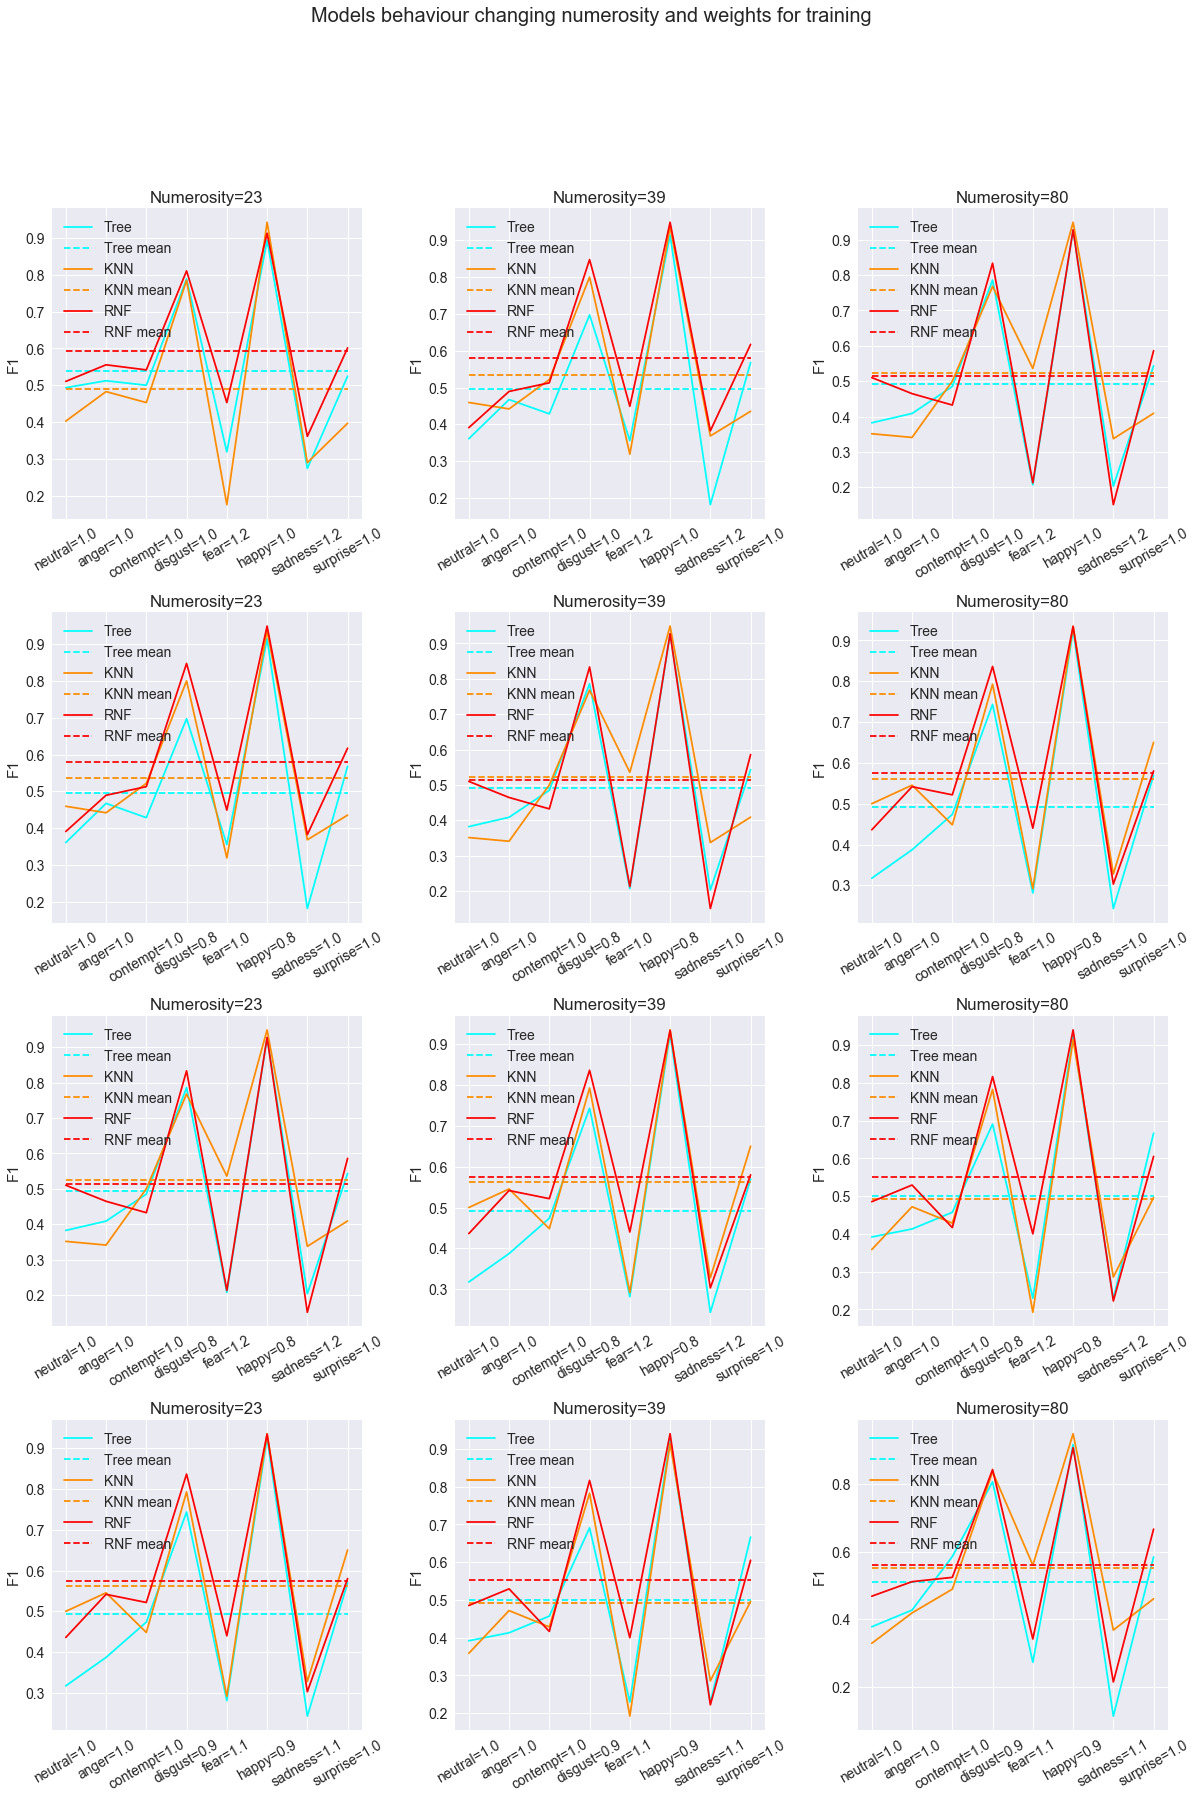

In [274]:
# CREATE PLOTS TO DISPLAY THE RESULTS
colors = {'Tree':'aqua',
          'KNN':'darkorange',
          'RNF': 'red'
         }

fig, axes = plt.subplots(nbr_row, nbr_col, figsize=(20,7*nbr_row))
fig_title = 'Models behaviour changing numerosity and weights for training'
fig.suptitle(fig_title, fontsize=20)
fig.subplots_adjust(wspace=.3, hspace=.3)

for k in range(nbr_row*nbr_col):
    j=k%nbr_col
    i=k//(nbr_row-1)
    #print('i=',i)
    #print('j',j)
    ax = axes[i,j]
    f1= f1_list[i+j]
    
    #print(N_list[j])
    wghts=weights_list[i]
    #print(wghts)
    
    for mdl in f1.keys():
        _=ax.plot(f1[mdl], color = colors[mdl], linestyle='-' , label=mdl)
        _=ax.plot(np.ones(len(f1[mdl]))*np.mean(f1[mdl]), color = colors[mdl], linestyle='--', label=mdl+' mean')

    ticks = ax.set_xticks(list(emo_map.keys()))
    labels = ax.set_xticklabels([list(emo_map.values())[i]+'='+str(wghts[i]) for i in range(len(wghts))], rotation=30)#, fontsize='small')
    _ = ax.set_title('Numerosity='+str(N_list[j]))
    #_ = ax.set_xlabel('Emotions');
    _ = ax.set_ylabel('F1')
    _ = ax.legend(loc="best")
plt.show()

# Conclusions
The best result for classifying the 8 emotion using AUs in term of F1 is around 0.6 riched by RNF. The disgust and happiness are overperformed, but fear and sadness are underperformed. Even tuning the weights of these classes there was not possible to achieve better results. These could be explained by the high variability of AUs for these emotions.
We should take into consideration the fact that the input data were produced by another ML models (OpenFace) that have its own accuracy. The quality of OpenFace output was quickly viewed with the outliers for every AU. Another point is that only 9 AUs were good for usage as input data for ML models. The results of this stage could be improved by improving the input data from one hand (it includes also the dataset) and tuning the used models or find another ones. 